# Advanced Regression Assignment - Rahul


## Step 1 - EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

In [481]:
housing_data = pd.read_csv("train.csv")

In [482]:
# Check numbers of rows and columns
housing_data.shape

(1460, 81)

In [483]:
# Check if there are null records
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [484]:
# describe the data to check count, mean, std deviation and outliers
housing_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [485]:
housing_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [486]:
# Check for duplicate data
dups = housing_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
housing_data[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [487]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [488]:
missing_data = housing_data.isnull().sum() 
missing_data_per = missing_data*100/len(housing_data) 
#missing_data_per.sort_values(ascending = False)
Only_missing_data_columns = missing_data_per[missing_data_per > 0]
Only_missing_data_columns.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [489]:
# Lets first impute the categorical variables with 'None' for below columns
Categorical_columns_having_null = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in Categorical_columns_having_null:
    housing_data[i].fillna("none", inplace=True)

In [490]:
missing_data = housing_data.isnull().sum() 
missing_data_per = missing_data*100/len(housing_data) 
#missing_data_per.sort_values(ascending = False)
Only_missing_data_columns = missing_data_per[missing_data_per > 0]
Only_missing_data_columns.sort_values(ascending = False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [491]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

housing_data['LotFrontage'] = housing_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)
housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median(), inplace=True)
housing_data["Electrical"].fillna("NA",inplace=True)

In [492]:
missing_data = housing_data.isnull().sum() 
missing_data_per = missing_data*100/len(housing_data) 
#missing_data_per.sort_values(ascending = False)
Only_missing_data_columns = missing_data_per[missing_data_per > 0]
Only_missing_data_columns.sort_values(ascending = False)

Series([], dtype: float64)

In [493]:
### All Null values are taken care of

In [494]:
def outliers_filter(x,y):
    lower_value = x[y].quantile(0.05)
    higer_value = x[y].quantile(0.95)
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

## 2 EDA on cleaned data

C:\Users\alkar\AppData\Local\Temp\ipykernel_11048\867745961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_data.corr()
C:\Users\alkar\AppData\Local\Temp\ipykernel_11048\867745961.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(housing_data.corr(), cmap="YlGnBu", annot=True)


AttributeError: 'Axes' object has no attribute 'show'

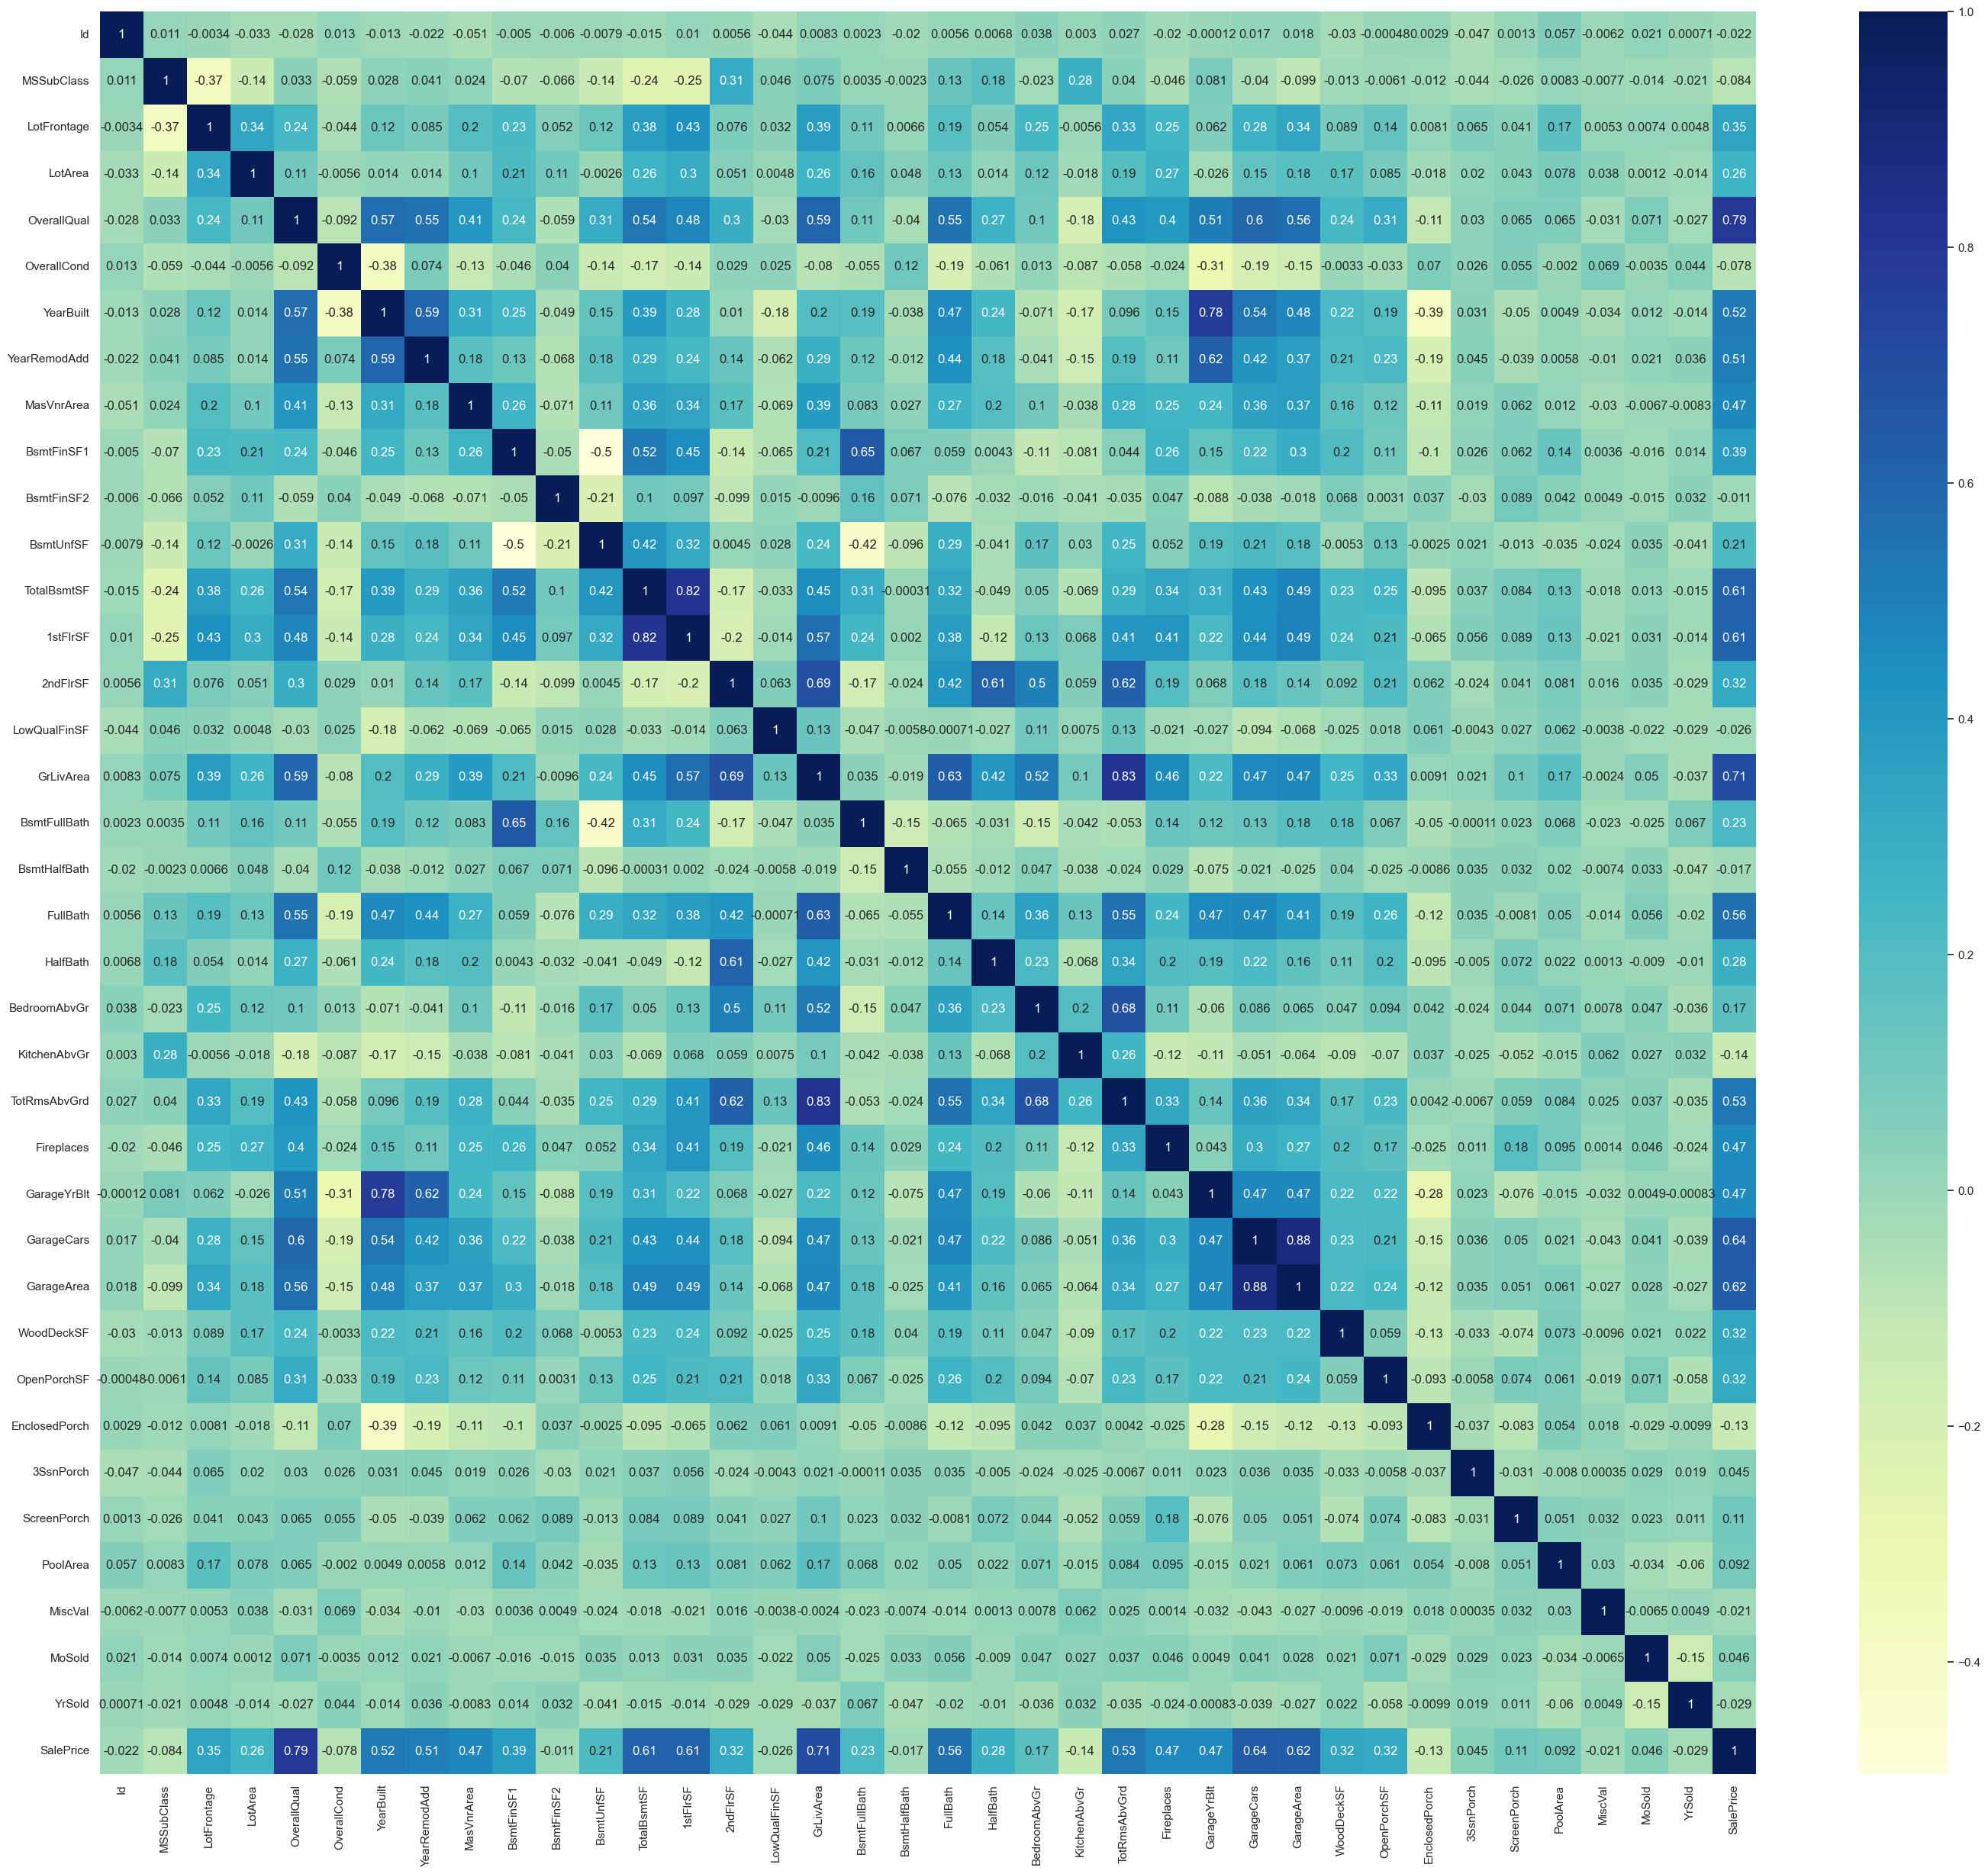

In [495]:
sns.set(rc={'figure.figsize':(35,30)})
housing_data.corr()
dataplot = sns.heatmap(housing_data.corr(), cmap="YlGnBu", annot=True)
#displaying heatmap

dataplot.show()

In [496]:

# Compute the correlation matrix
correlation_matrix = housing_data.corr()
correlation_matrix

C:\Users\alkar\AppData\Local\Temp\ipykernel_11048\1945644417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.119174 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.332619  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062380 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.281393  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.349876  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

In [497]:
# Set a threshold
threshold = 0.4

# Columns that are highly correlated with 'A'
highly_correlated_with_SalePrice = []

for col in correlation_matrix.columns:
    if col != 'SalePrice':  # ignore the column itself
        if abs(correlation_matrix['SalePrice'][col]) >= threshold:
            highly_correlated_with_SalePrice.append(col)

print(highly_correlated_with_SalePrice)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [498]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
#sns.pairplot(housing_data[cols], height = 2.5)
#plt.show()

AttributeError: 'Axes' object has no attribute 'show'

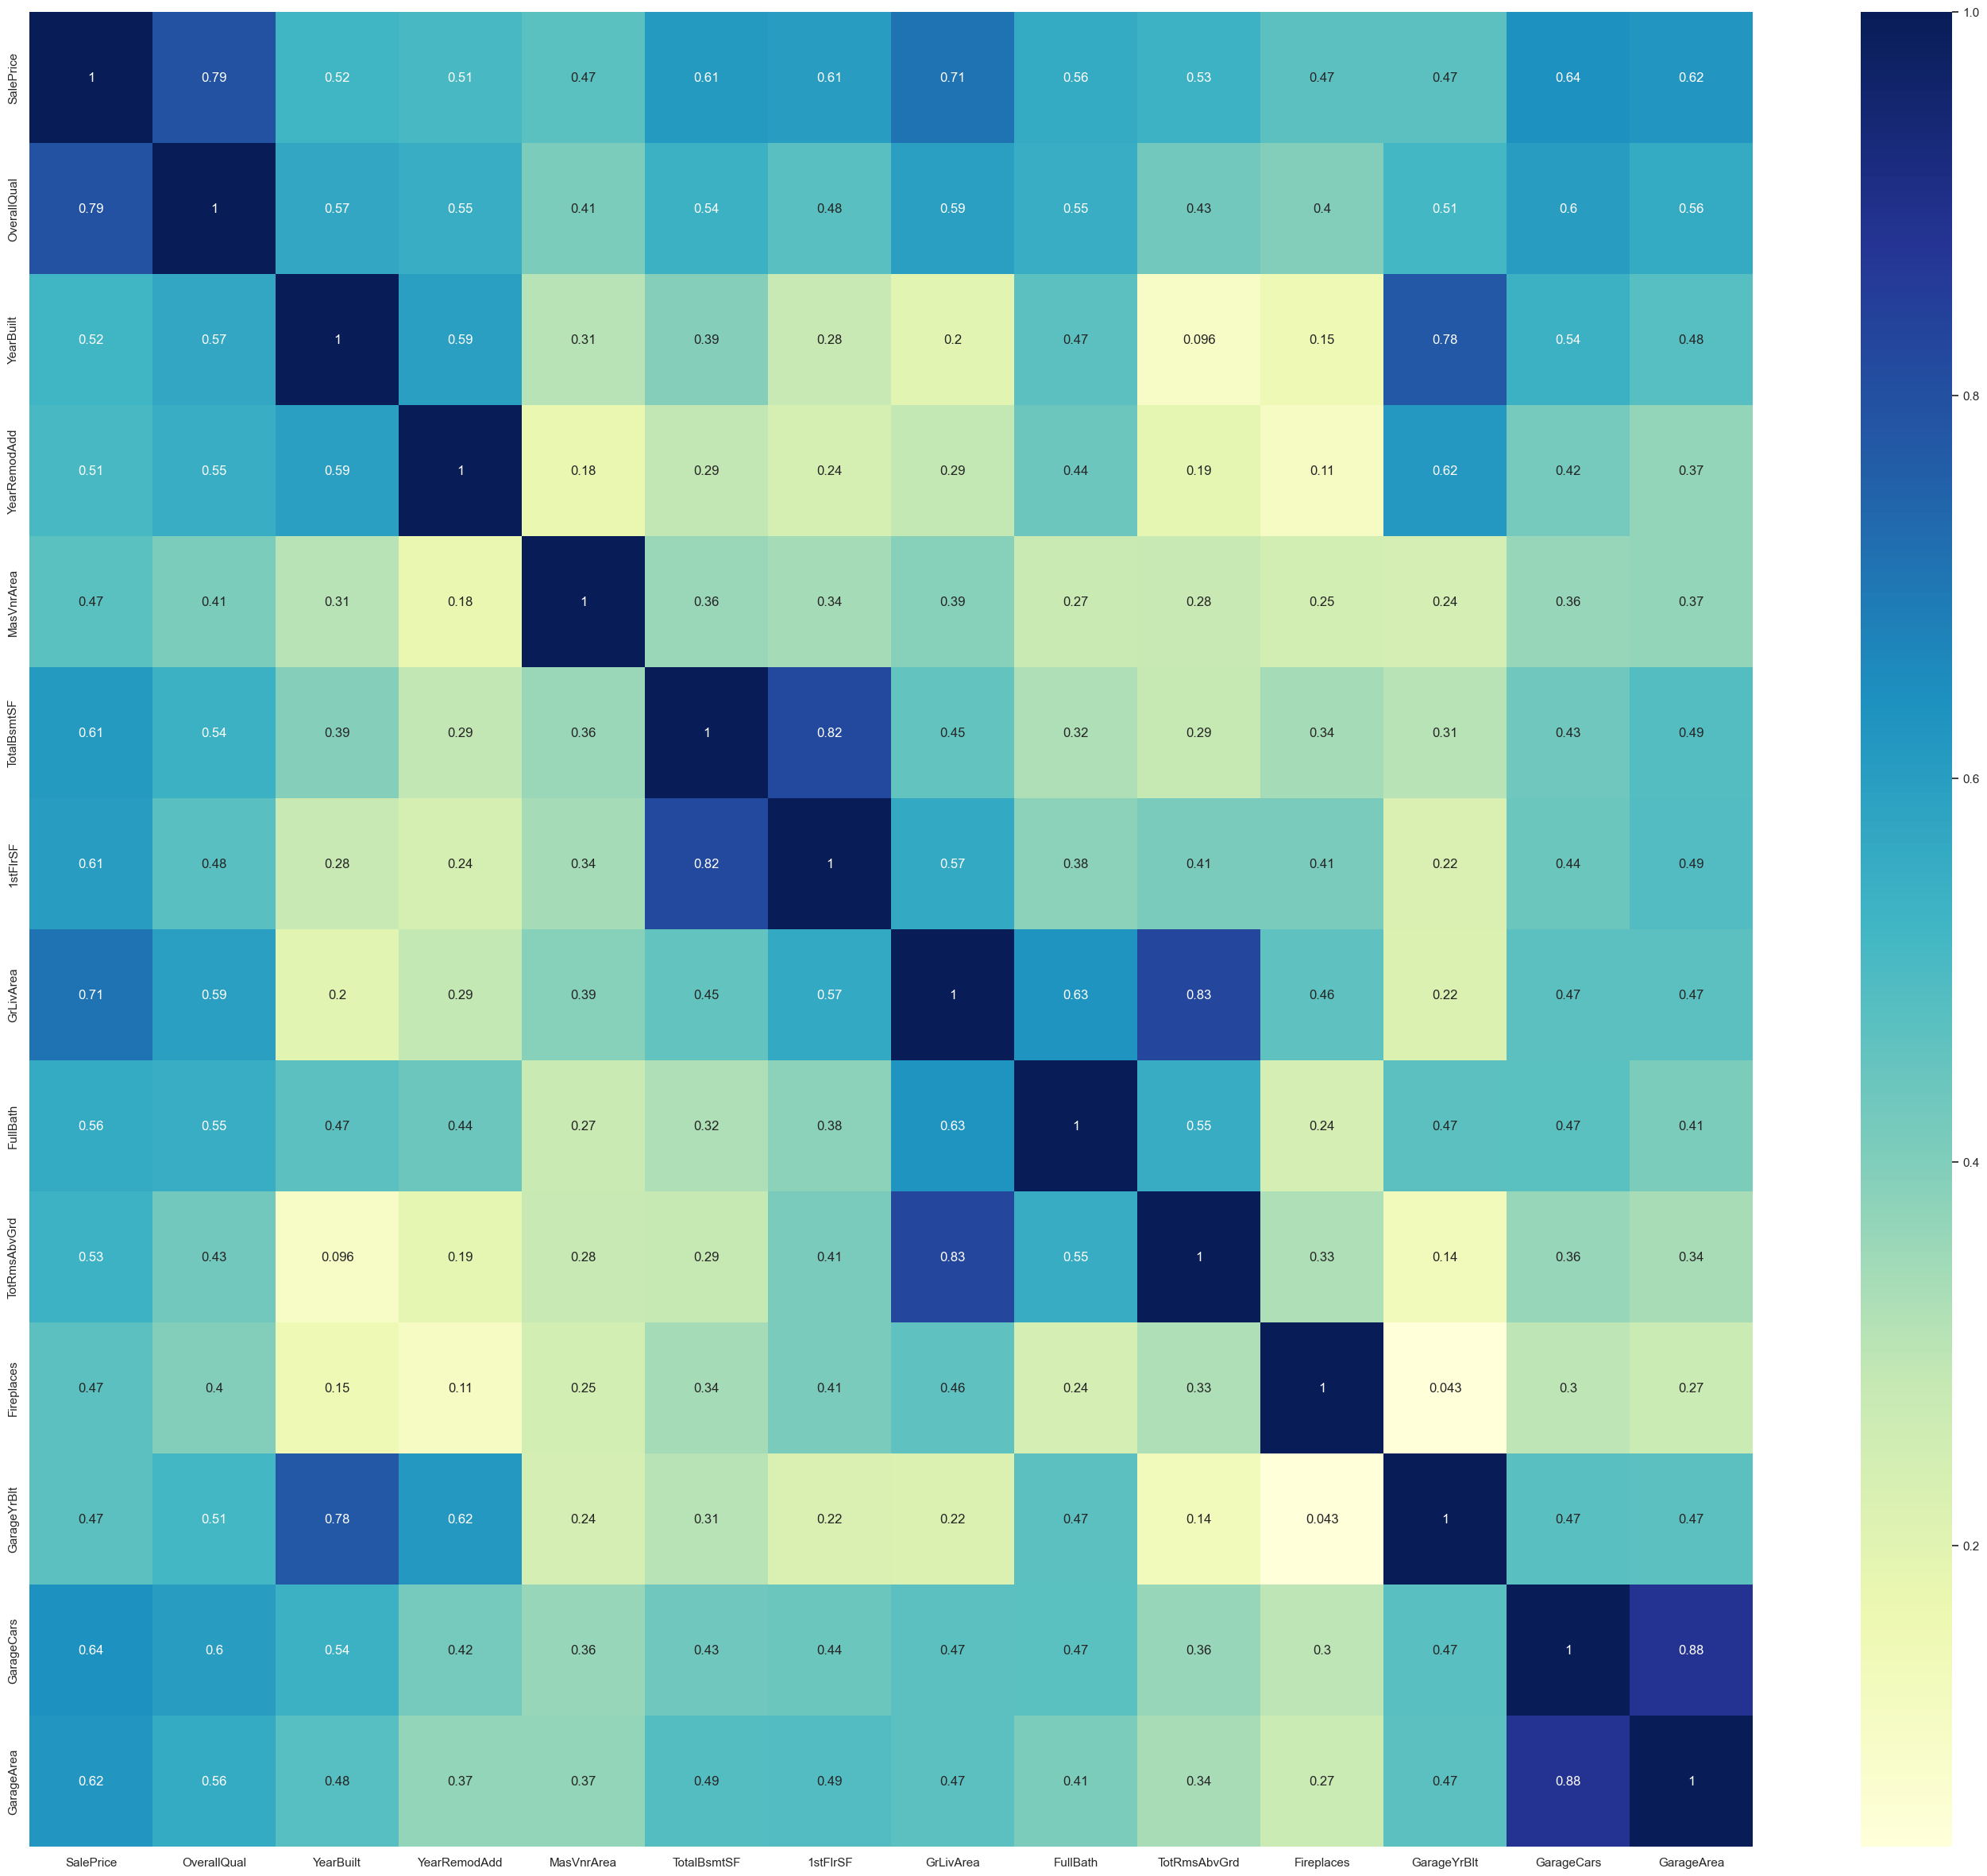

In [499]:
sns.set(rc={'figure.figsize':(35,30)})
housing_data[cols].corr()
dataplot = sns.heatmap(housing_data[cols].corr(), cmap="YlGnBu", annot=True)
#displaying heatmap

dataplot.show()

In [500]:
housing_data_1 = housing_data[cols]

In [501]:
# WE get list of highly correlated columns with Sales price. Howevere some of these variables are highly 
# correlated with other variables so we can get few of them removed.
housing_data_1.head()

SalePrice  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0     208500            7       2003          2003       196.0          856   
1     181500            6       1976          1976         0.0         1262   
2     223500            7       2001          2002       162.0          920   
3     140000            7       1915          1970         0.0          756   
4     250000            8       2000          2000       350.0         1145   

   1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0       856       1710         2             8           0       2003.0   
1      1262       1262         2             6           1       1976.0   
2       920       1786         2             6           1       2001.0   
3       961       1717         1             7           1       1998.0   
4      1145       2198         2             9           1       2000.0   

   GarageCars  GarageArea  
0           2         548  
1           2         460  
2           2         608  
3           3         642  
4           3         836

In [502]:
correlation_matrix = housing_data_1.corr()

threshold = 0.6

# Find pairs of columns that exceed the threshold
highly_correlated_pairs = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx:  # ignore the diagonal
            if abs(correlation_matrix[col][idx]) >= threshold:
                pair = tuple(sorted([col, idx]))
                if pair not in highly_correlated_pairs:
                    highly_correlated_pairs.append(pair)

print(highly_correlated_pairs)

[('OverallQual', 'SalePrice'), ('SalePrice', 'TotalBsmtSF'), ('1stFlrSF', 'SalePrice'), ('GrLivArea', 'SalePrice'), ('GarageCars', 'SalePrice'), ('GarageArea', 'SalePrice'), ('GarageCars', 'OverallQual'), ('GarageYrBlt', 'YearBuilt'), ('GarageYrBlt', 'YearRemodAdd'), ('1stFlrSF', 'TotalBsmtSF'), ('FullBath', 'GrLivArea'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageArea', 'GarageCars')]


In [503]:
# Above gives pair of columns highly correlated , we can remove selected columns from the model.
# We will remove GarageCars, GarageYrBlt, 1stFlrSF,FullBath, TotRmsAbvGrd


In [504]:
housing_data_2 = housing_data_1.drop(['GarageCars', 'GarageYrBlt', '1stFlrSF','FullBath', 'TotRmsAbvGrd'], axis =1)

In [505]:
housing_data_2.shape

(1460, 9)

In [506]:
housing_data_2.head()

SalePrice  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0     208500            7       2003          2003       196.0          856   
1     181500            6       1976          1976         0.0         1262   
2     223500            7       2001          2002       162.0          920   
3     140000            7       1915          1970         0.0          756   
4     250000            8       2000          2000       350.0         1145   

   GrLivArea  Fireplaces  GarageArea  
0       1710           0         548  
1       1262           1         460  
2       1786           1         608  
3       1717           1         642  
4       2198           1         836

In [ ]:
sns.set(rc={'figure.figsize':(35,30)})
housing_data_2.corr()
dataplot = sns.heatmap(housing_data_2.corr(), cmap="YlGnBu", annot=True)
#displaying heatmap

dataplot.show()

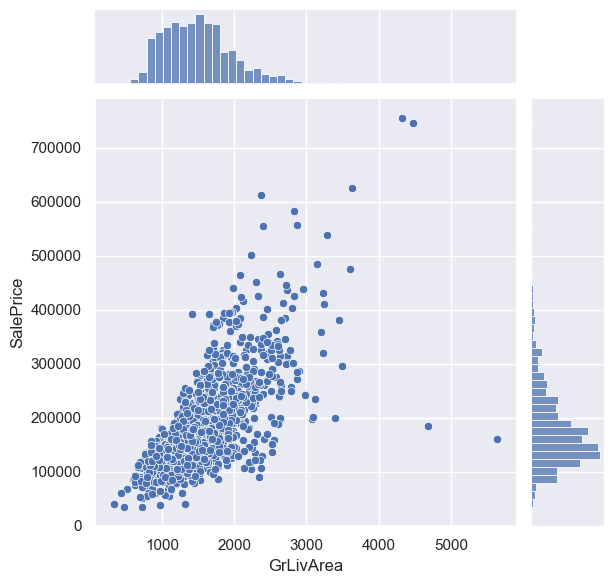

In [507]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housing_data_2)
plt.show()

In [508]:
# Removing some outliers on lower right side of 'GrLivArea'
housing_data = outliers_filter(housing_data,'GrLivArea')

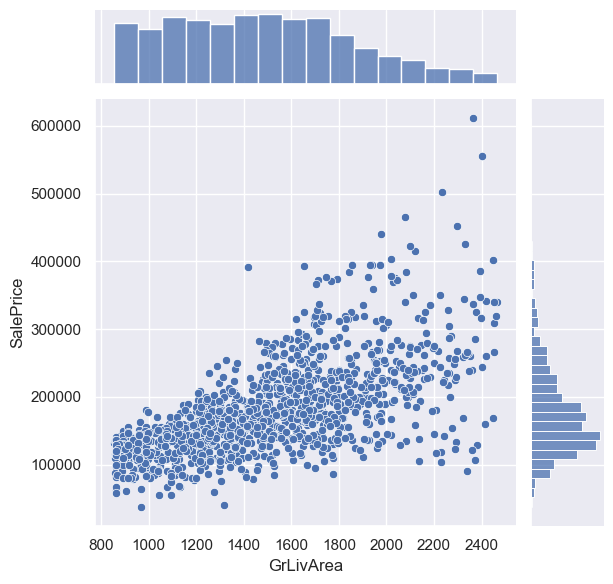

In [509]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housing_data)
plt.show()

In [510]:
housing_data.shape

(1309, 81)

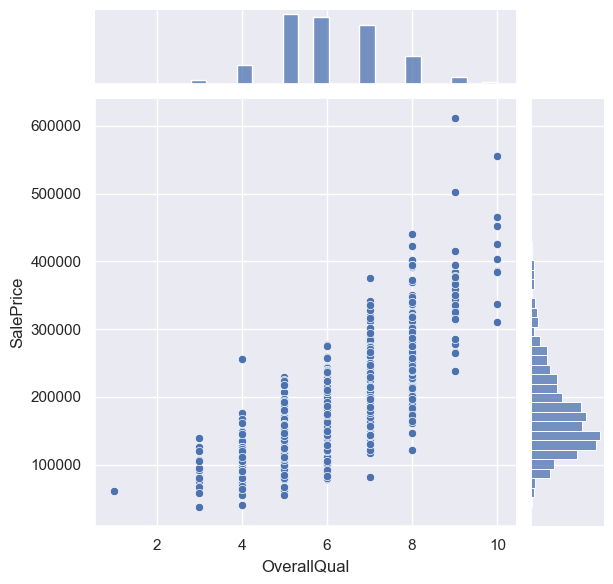

In [511]:
# Analyse some important numeric columns
sns.jointplot(x='OverallQual', y='SalePrice', data=housing_data)
plt.show()

In [512]:
housing_data.shape

(1309, 81)

In [521]:
#Drop columns from the dataset which are highly correlated with other variables as identified in previous steps
housing_data_2 = housing_data.drop(['GarageCars', 'GarageYrBlt', '1stFlrSF','FullBath', 'TotRmsAbvGrd'], axis =1)

In [522]:
housing_data_2.shape

(1309, 76)

In [523]:
# Check for Categorical Columns now


In [524]:
housing_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1309 non-null   int64  
 1   MSSubClass     1309 non-null   int64  
 2   MSZoning       1309 non-null   object 
 3   LotFrontage    1309 non-null   float64
 4   LotArea        1309 non-null   int64  
 5   Street         1309 non-null   object 
 6   Alley          1309 non-null   object 
 7   LotShape       1309 non-null   object 
 8   LandContour    1309 non-null   object 
 9   Utilities      1309 non-null   object 
 10  LotConfig      1309 non-null   object 
 11  LandSlope      1309 non-null   object 
 12  Neighborhood   1309 non-null   object 
 13  Condition1     1309 non-null   object 
 14  Condition2     1309 non-null   object 
 15  BldgType       1309 non-null   object 
 16  HouseStyle     1309 non-null   object 
 17  OverallQual    1309 non-null   int64  
 18  OverallC

In [525]:
#type of each feature in data: int, float, object
types = housing_data_2.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]


In [526]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [527]:
housing_data_2.shape

(1309, 76)

In [528]:
missing_data = housing_data_2.isnull().sum() 
missing_data_per = missing_data*100/len(housing_data) 
#missing_data_per.sort_values(ascending = False)
Only_missing_data_columns = missing_data_per[missing_data_per > 0]
Only_missing_data_columns.sort_values(ascending = False)

Series([], dtype: float64)

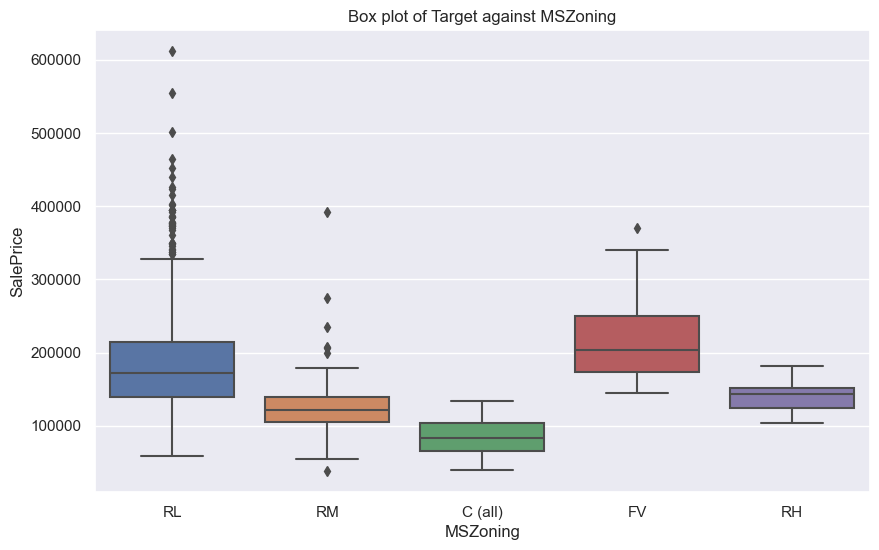

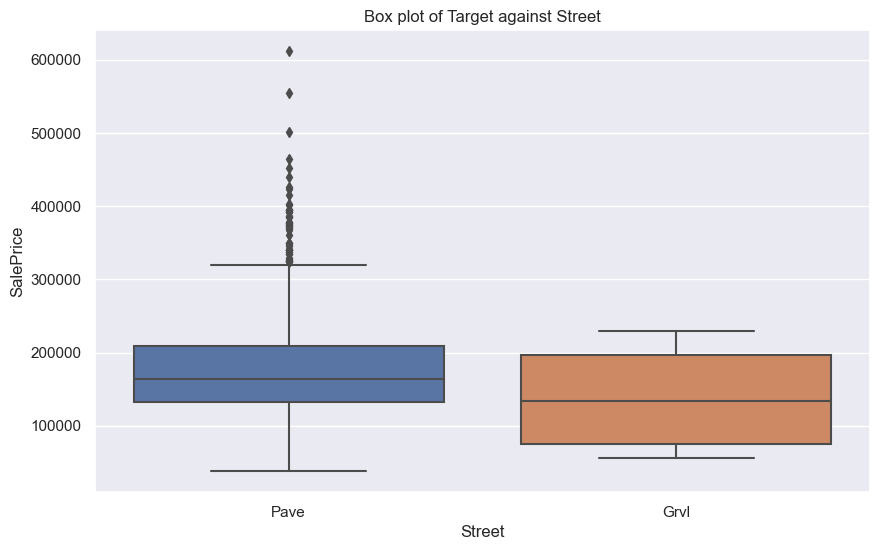

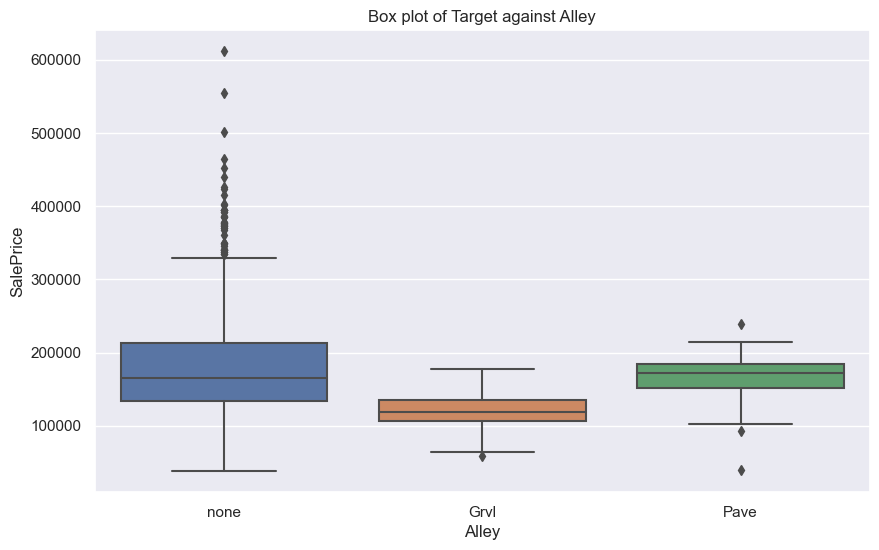

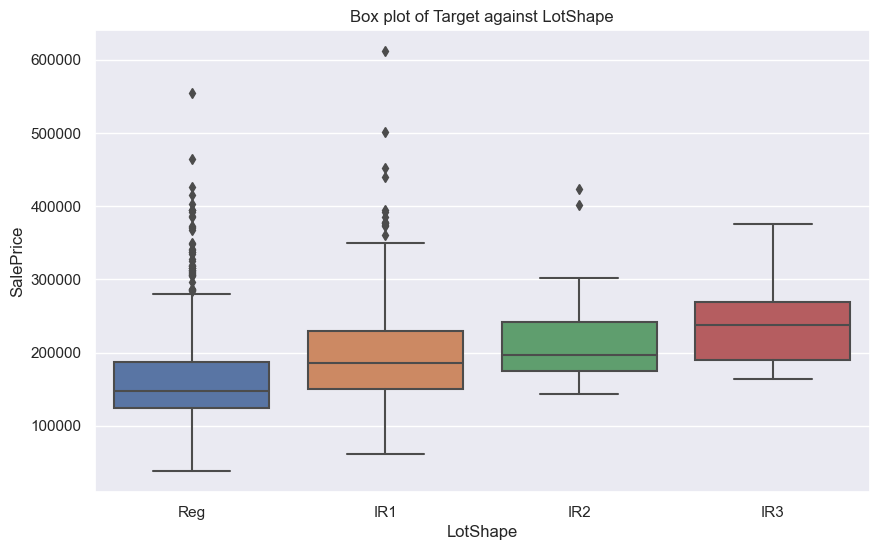

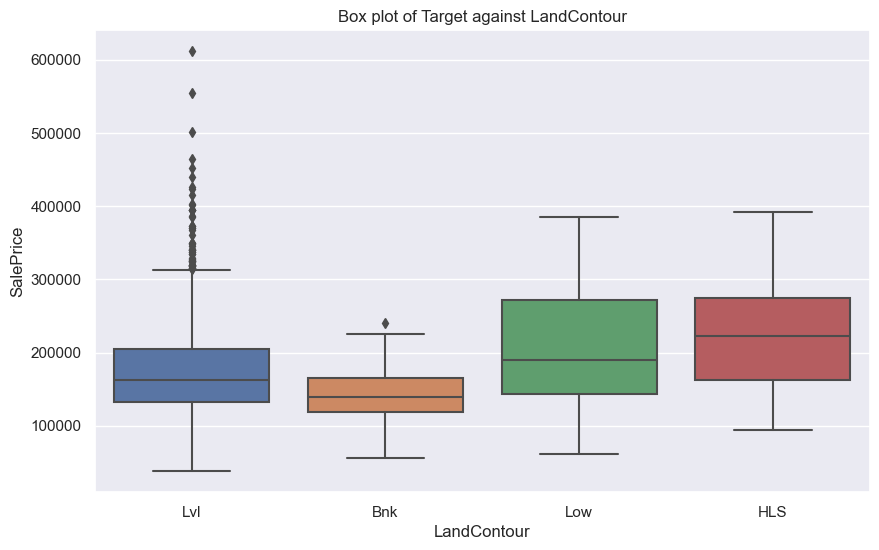

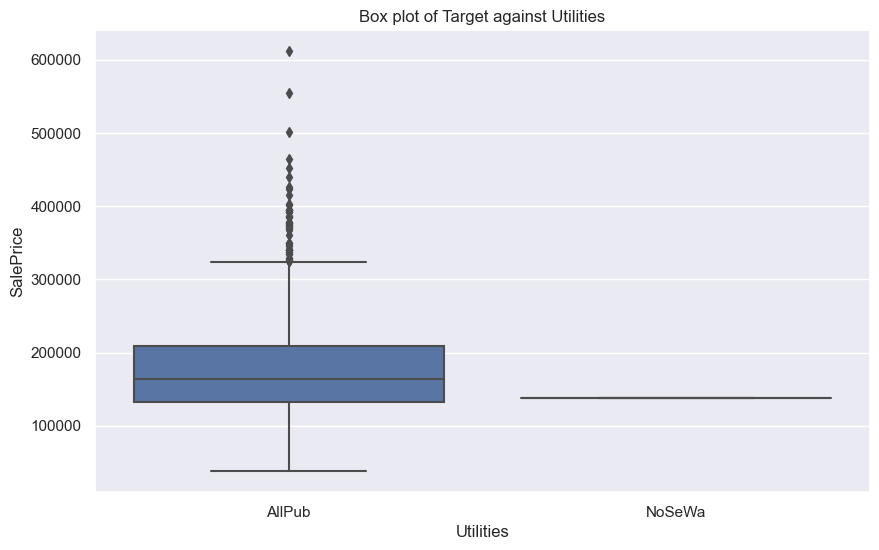

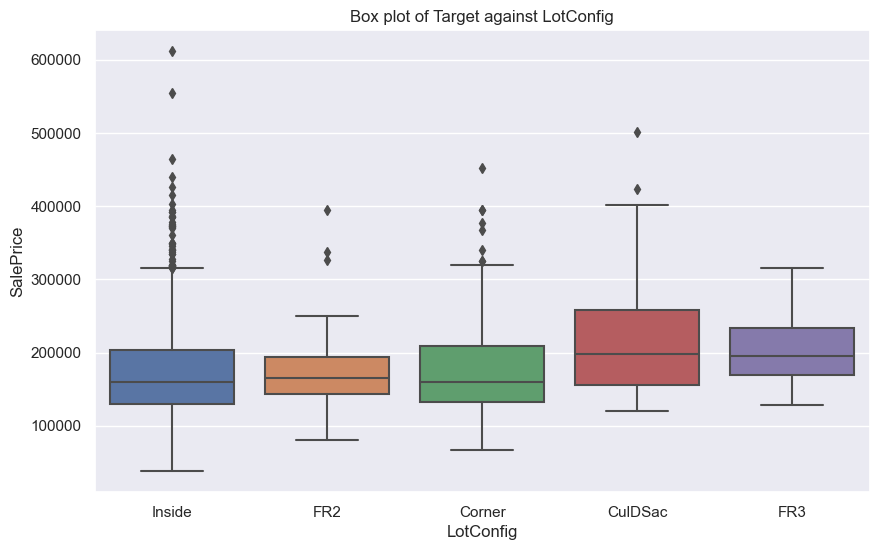

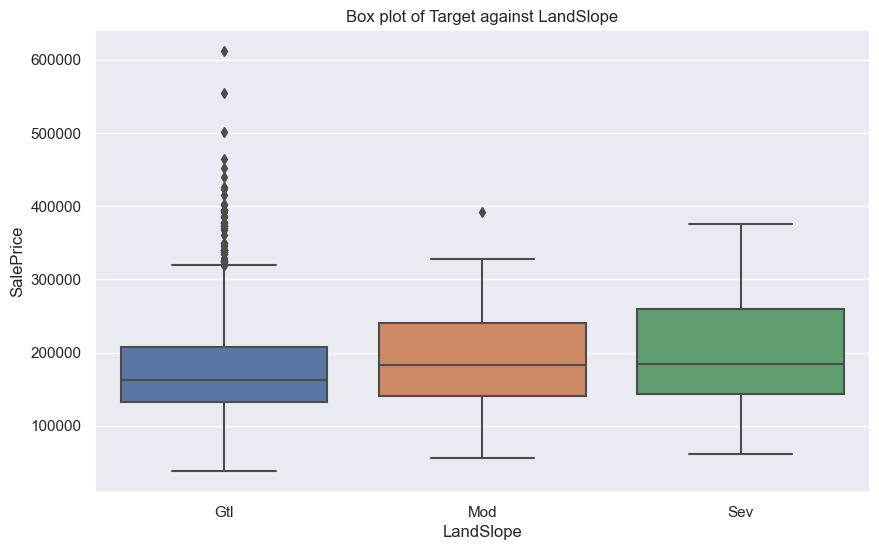

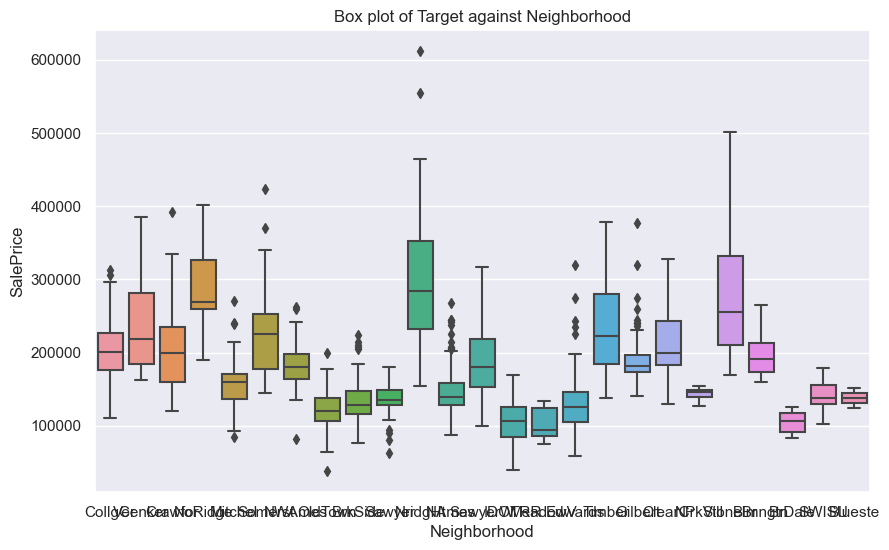

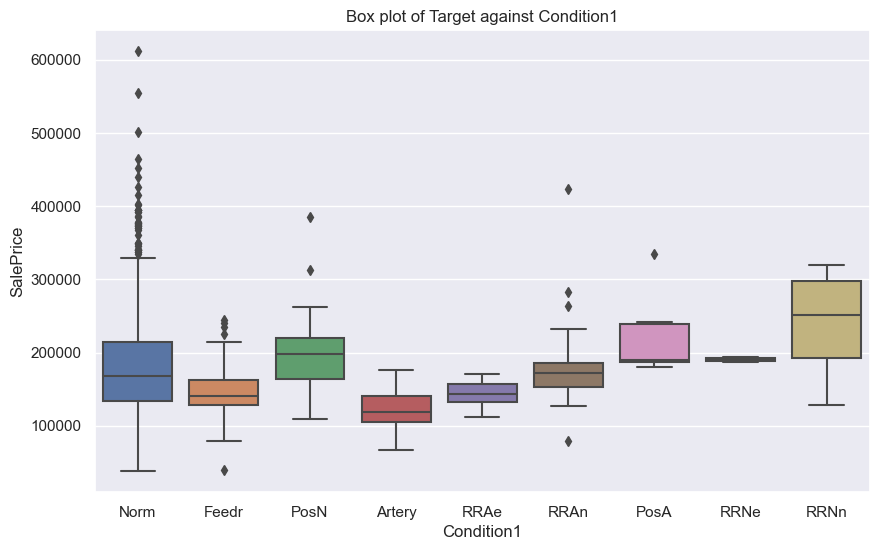

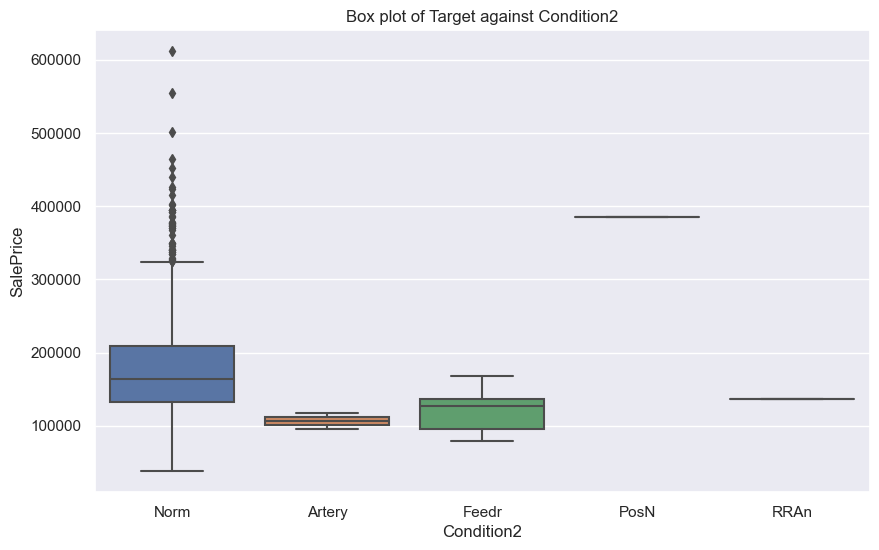

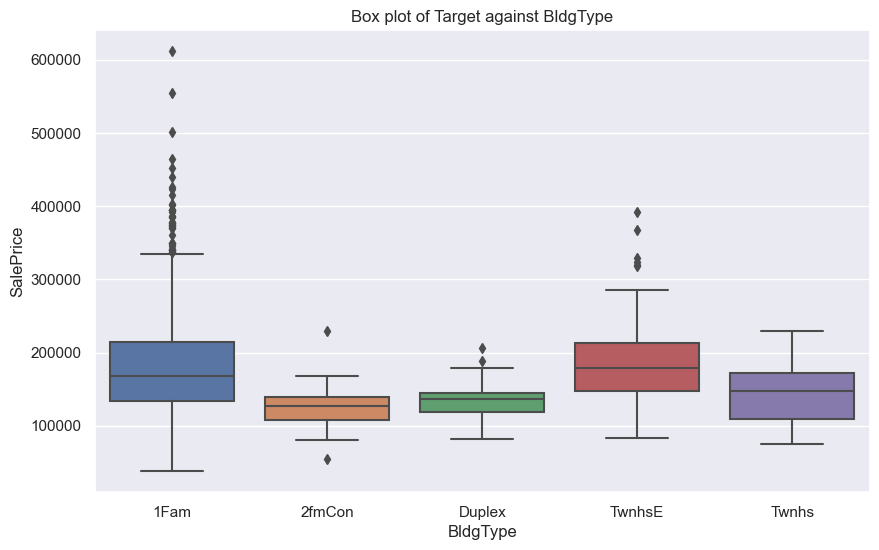

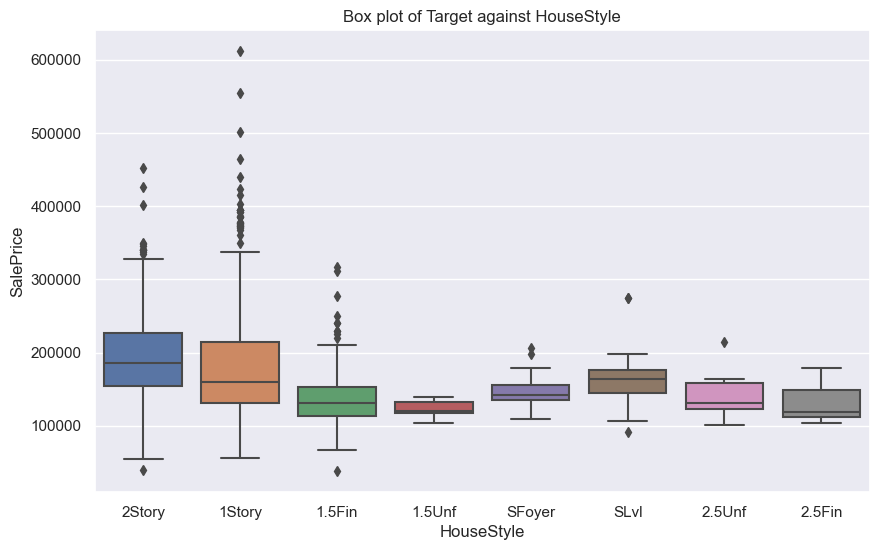

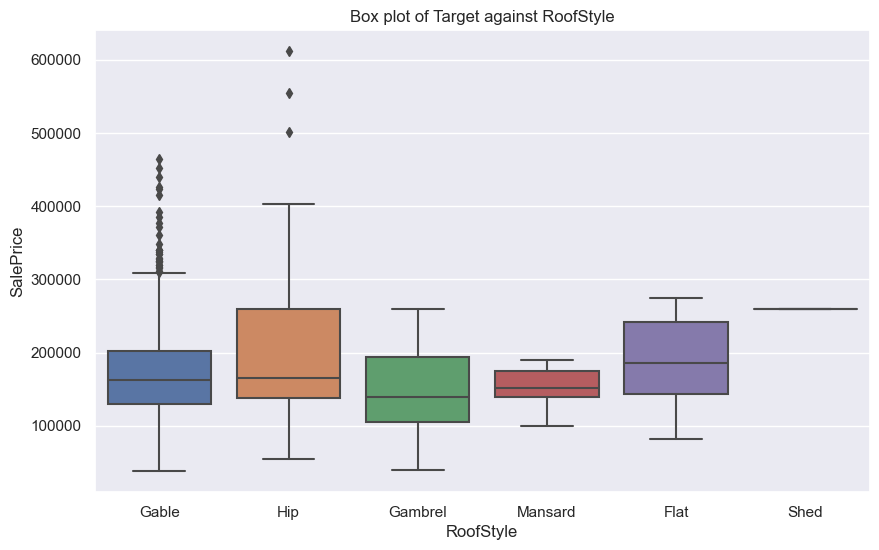

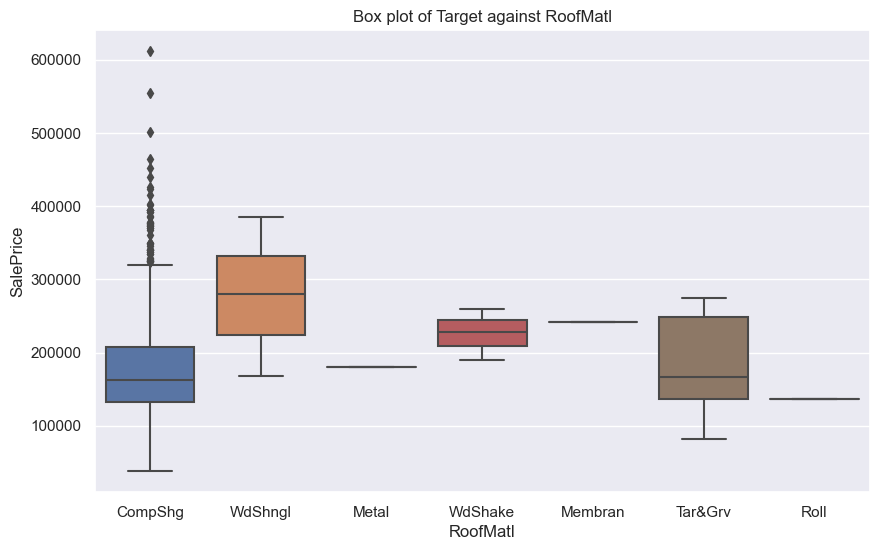

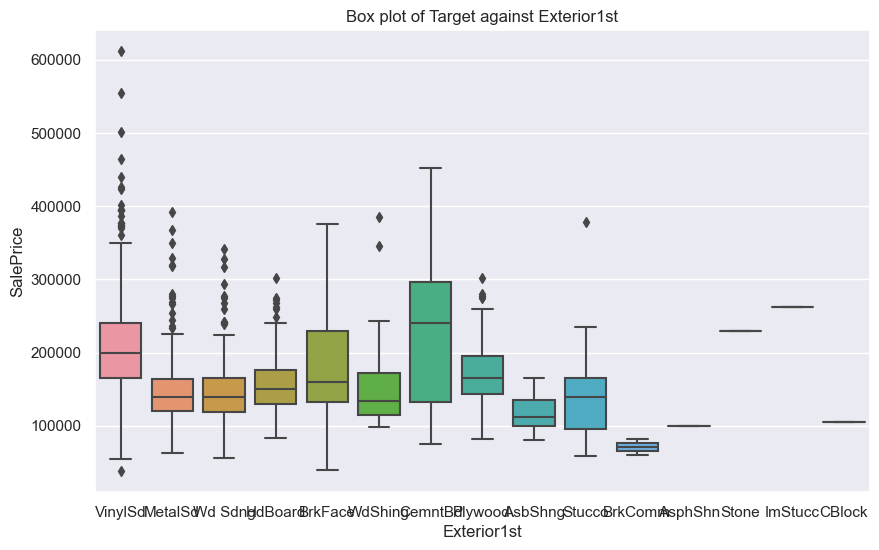

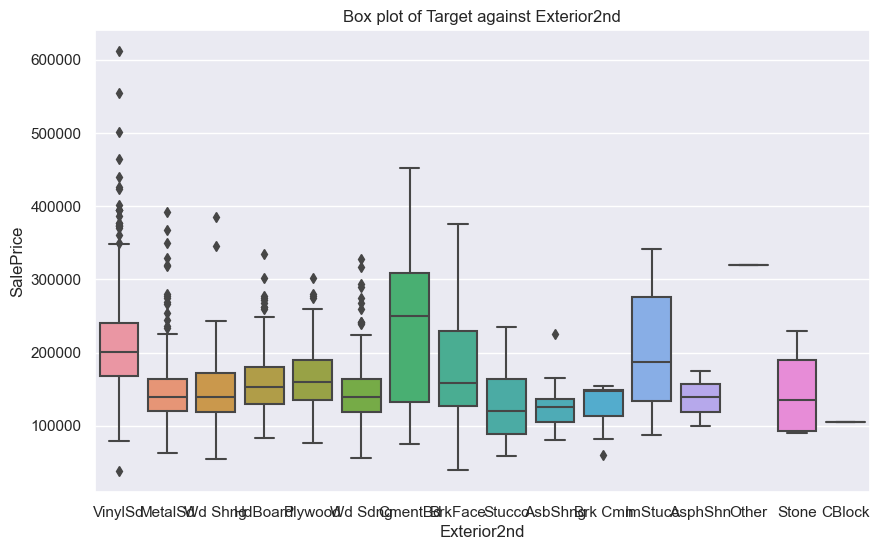

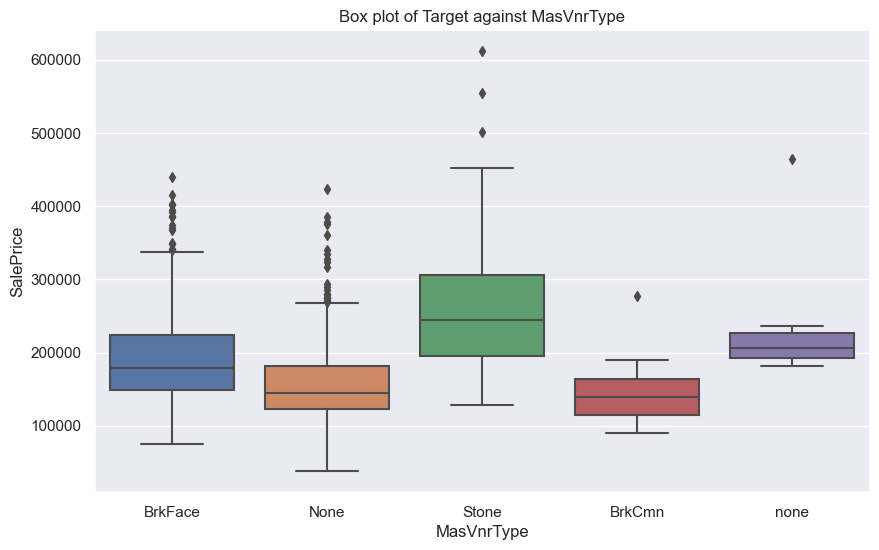

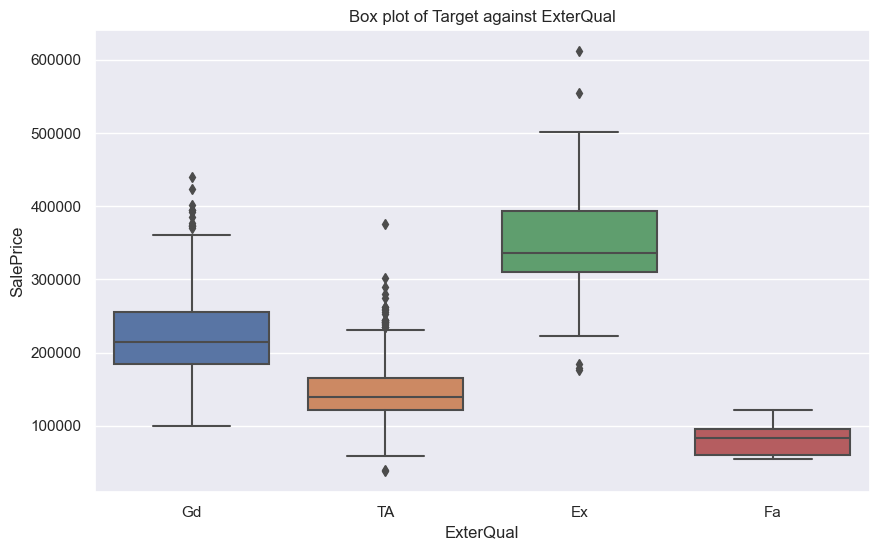

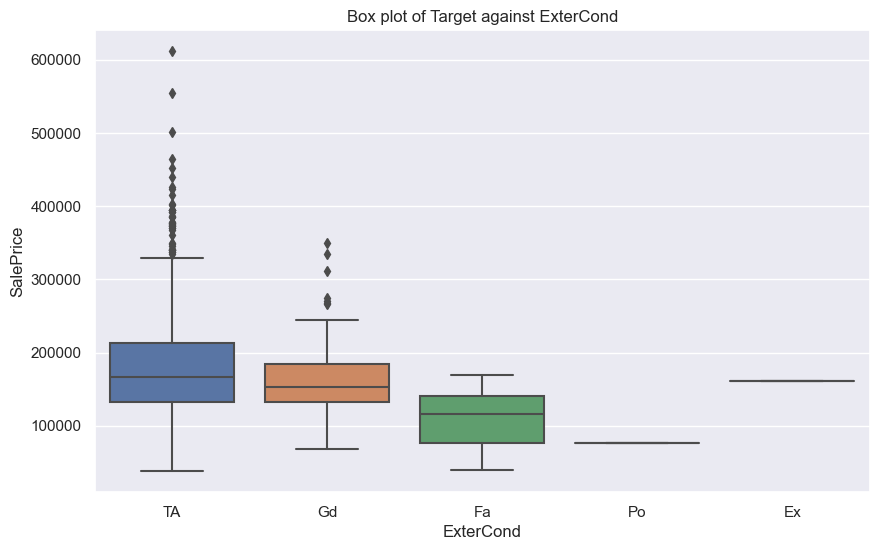

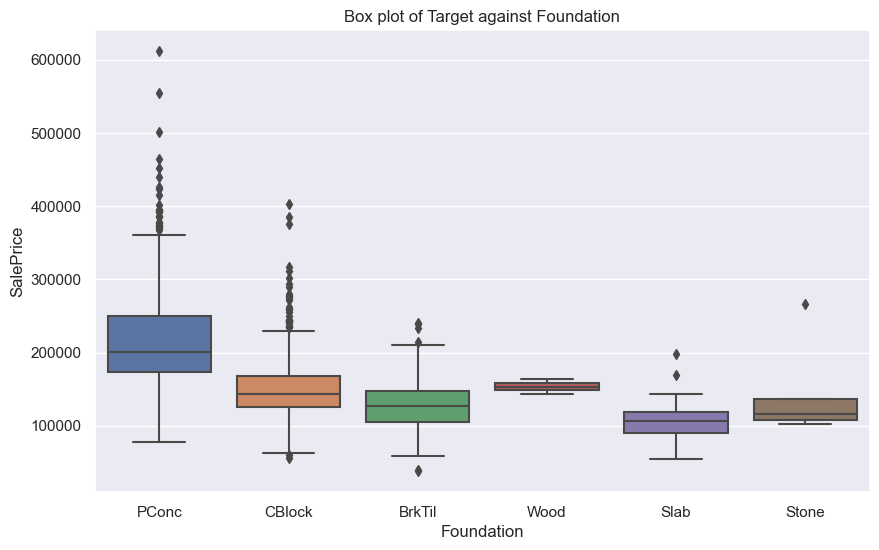

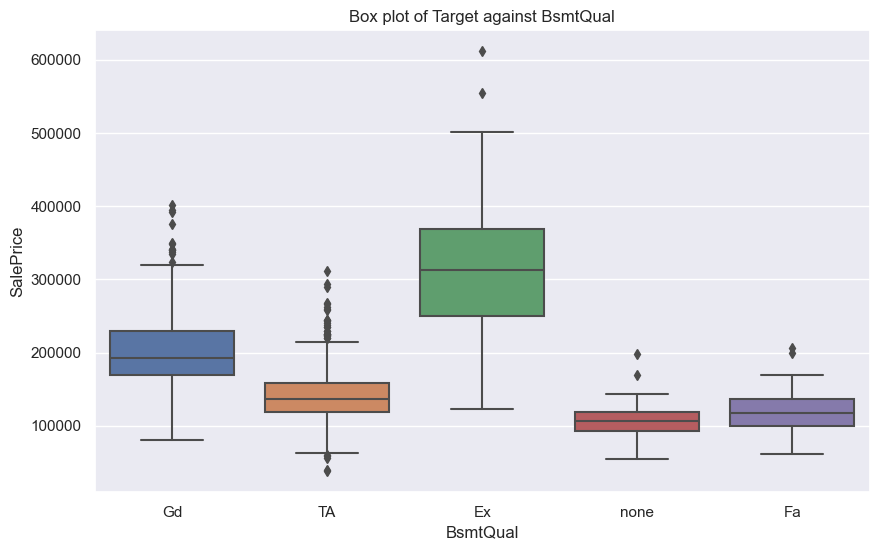

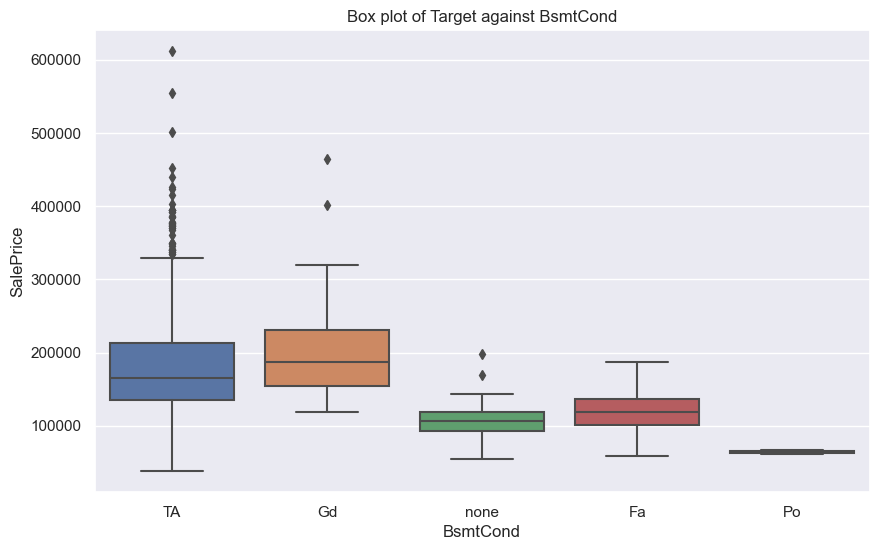

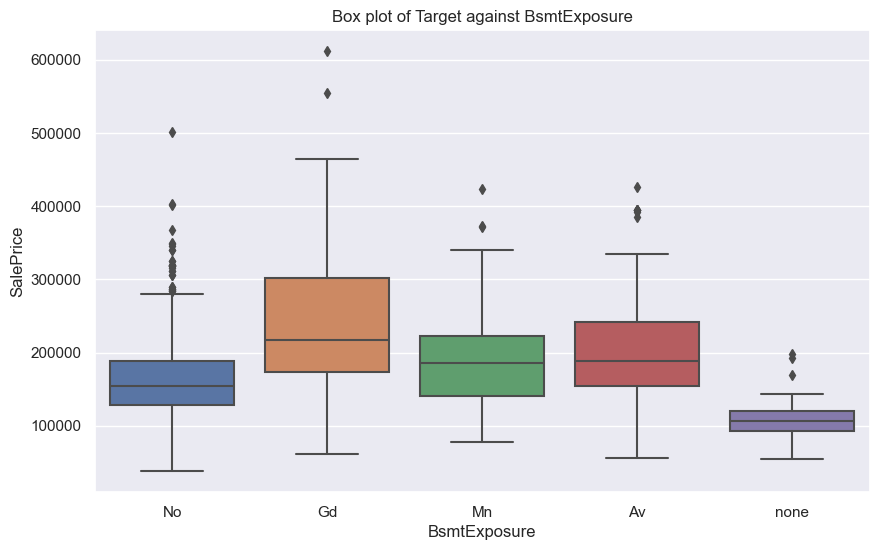

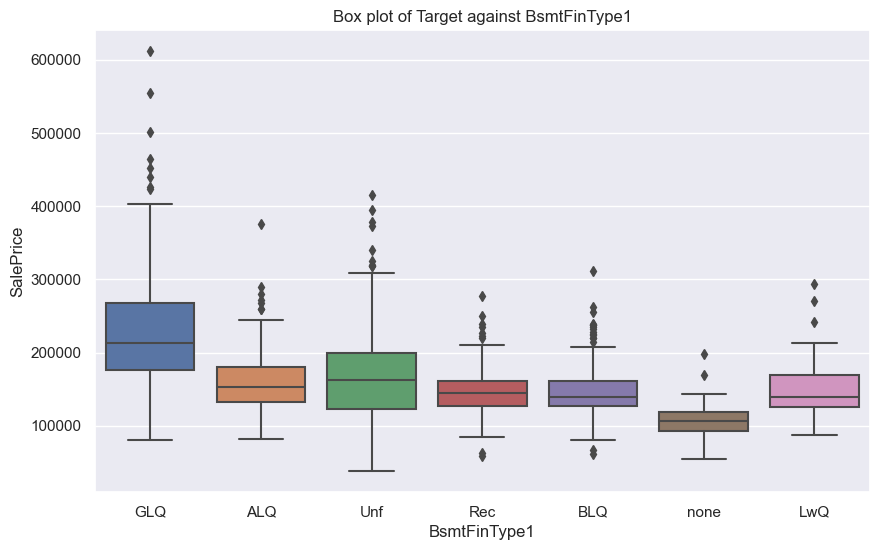

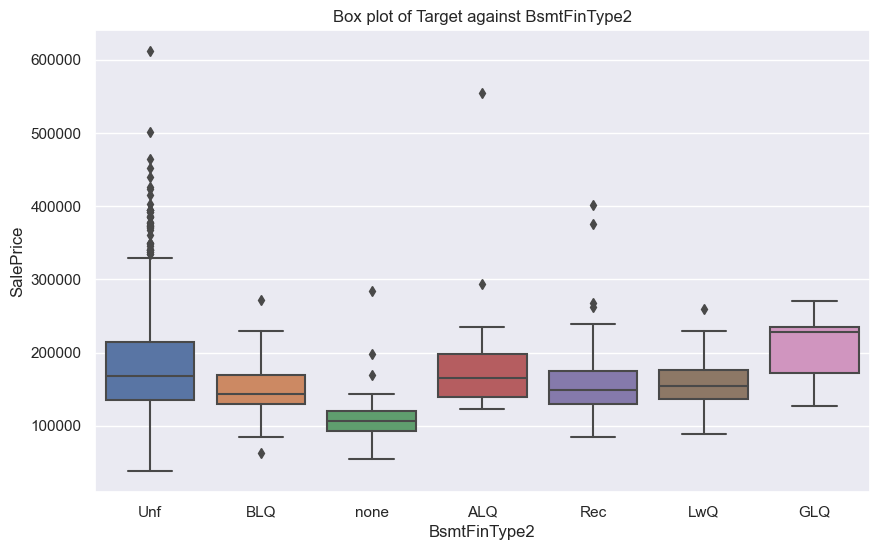

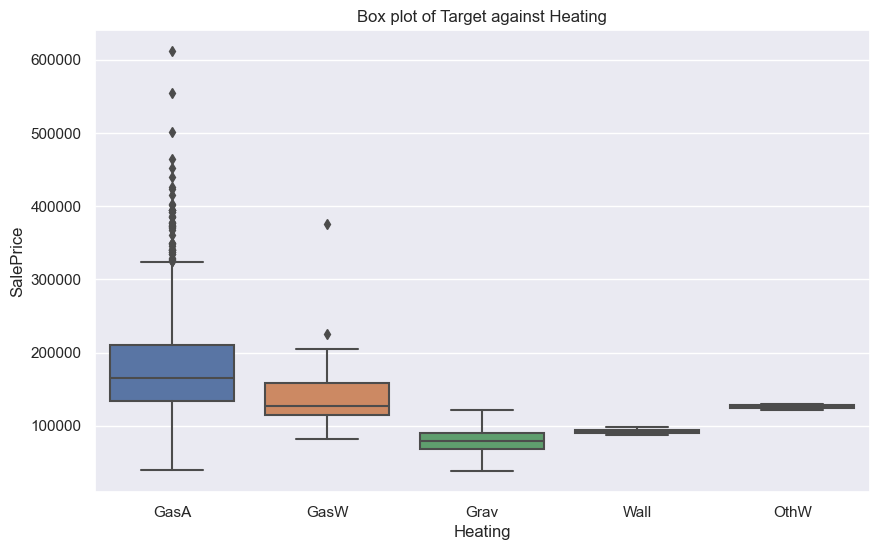

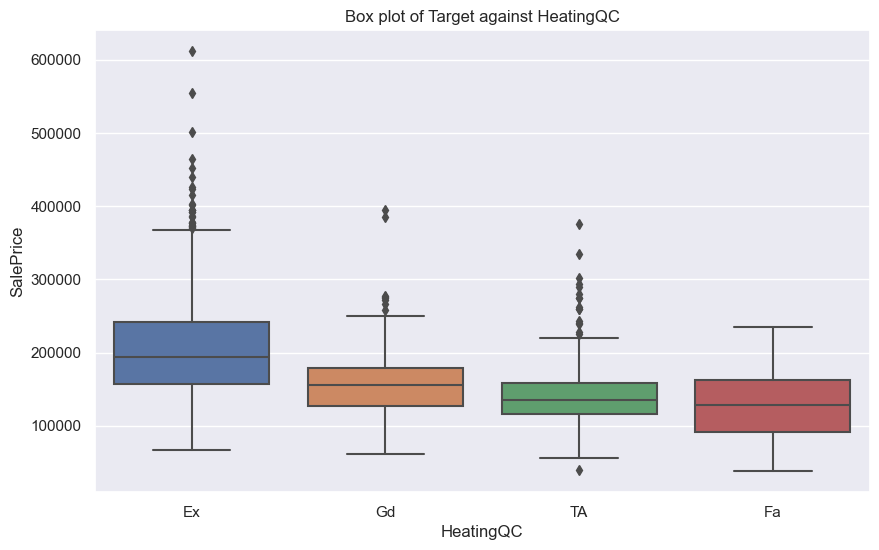

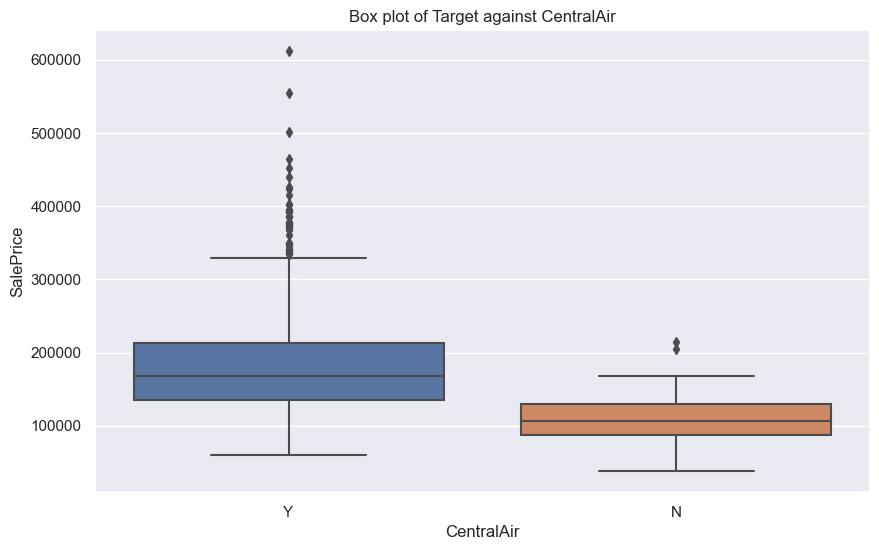

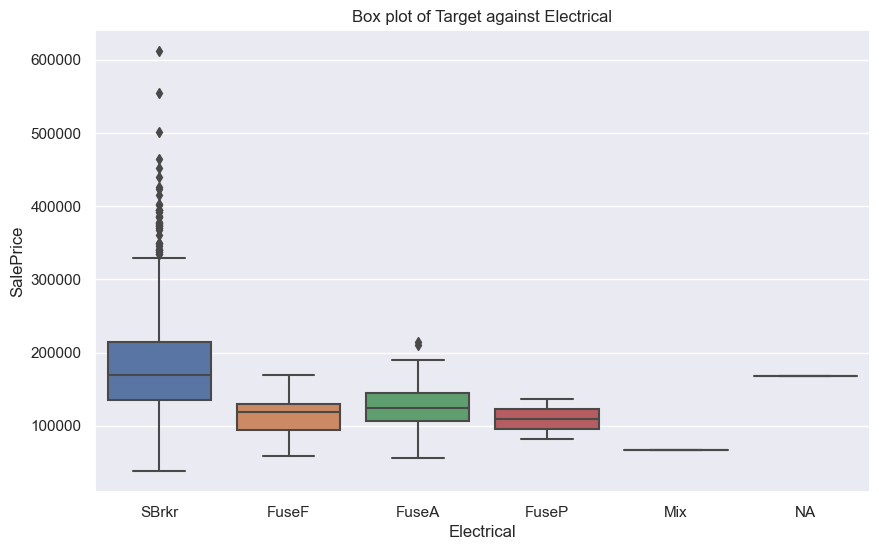

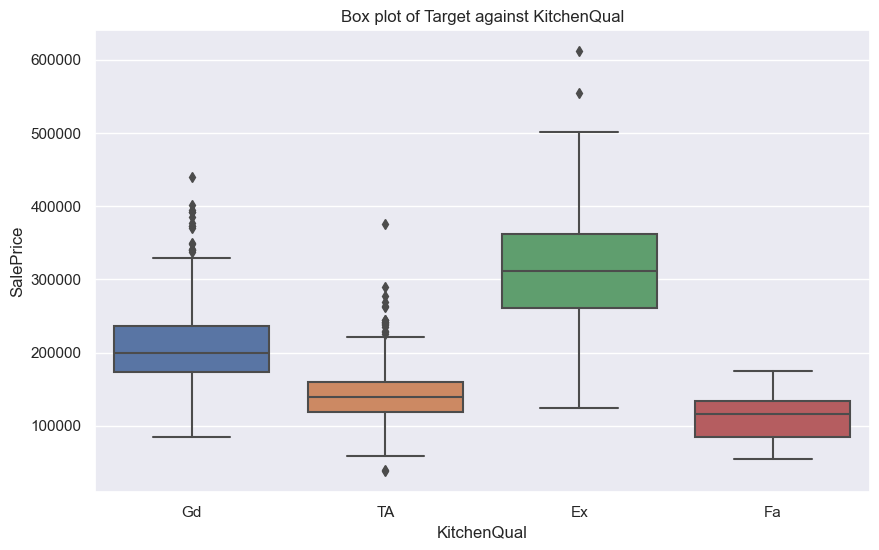

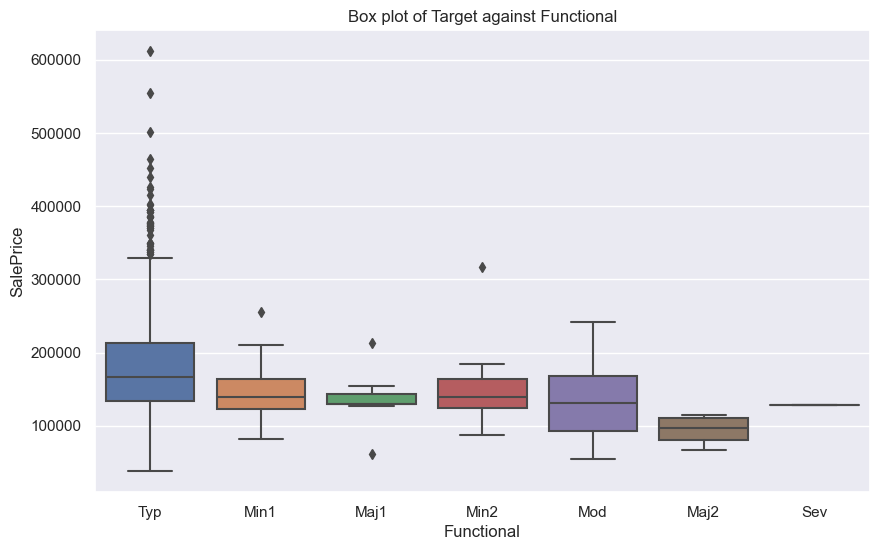

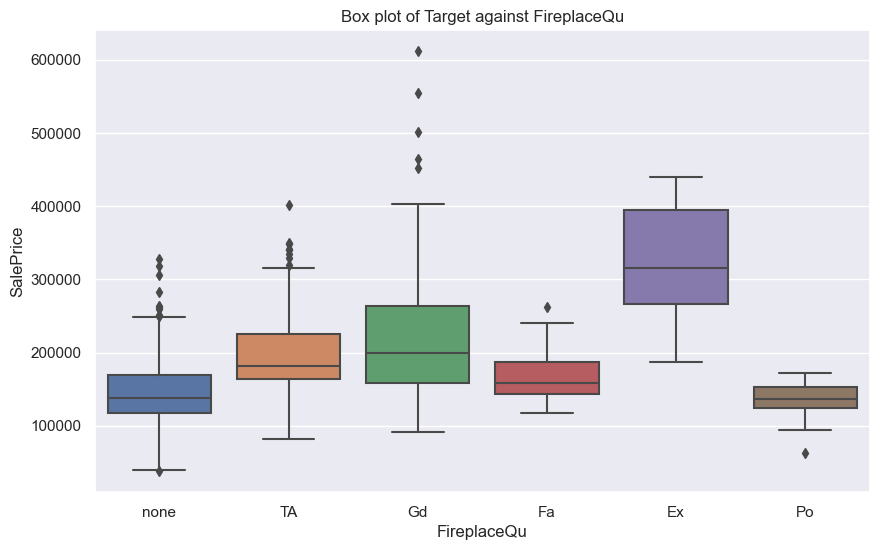

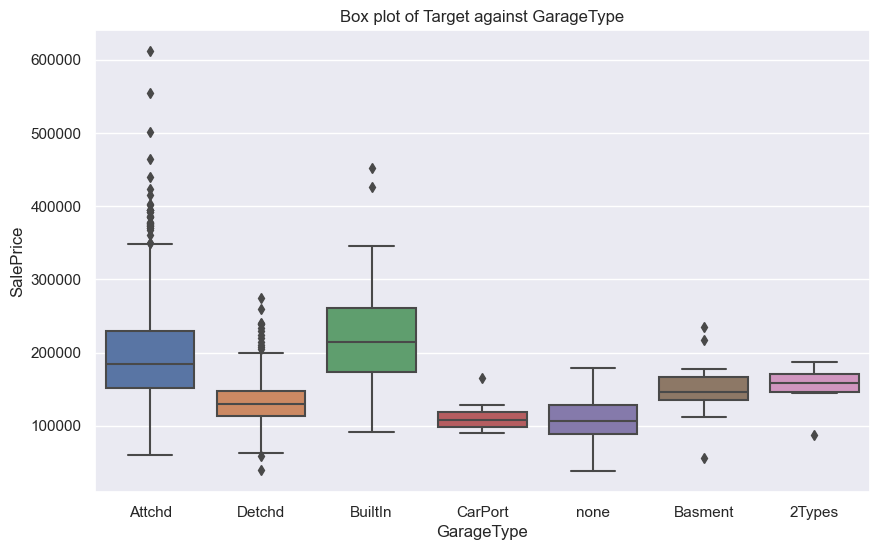

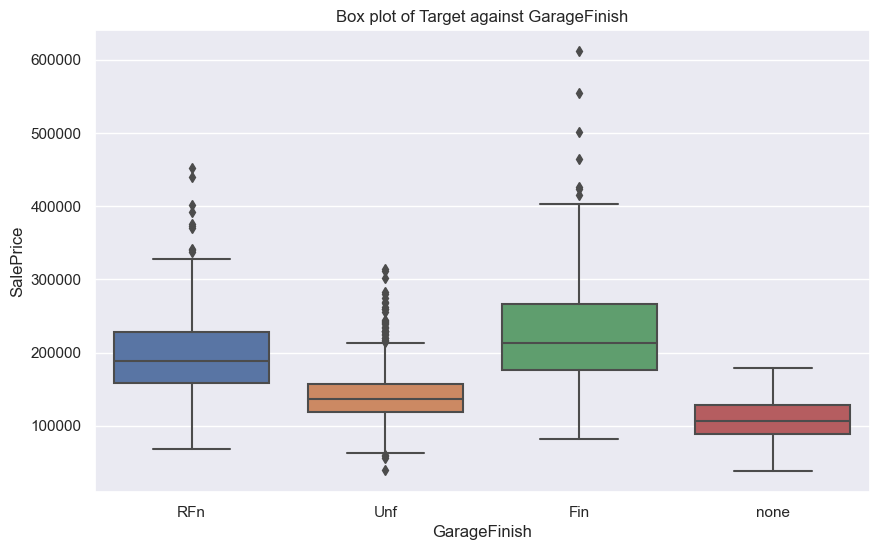

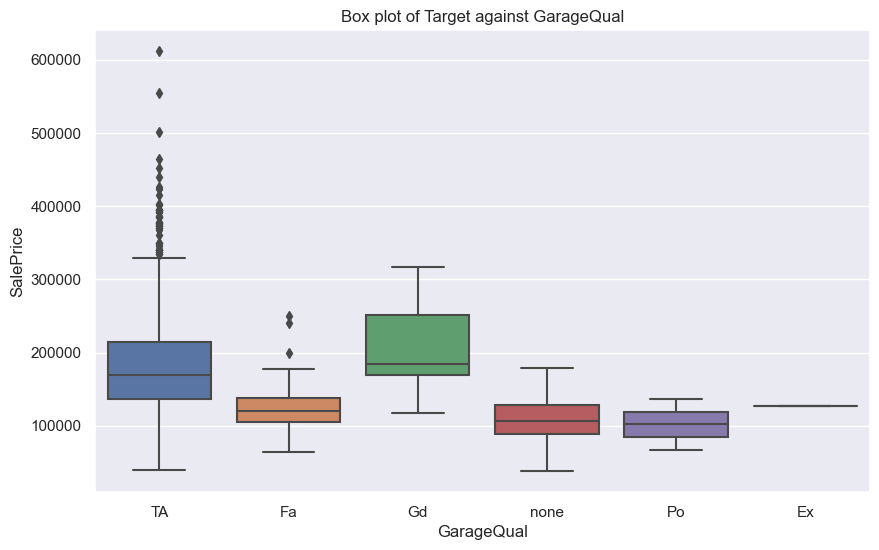

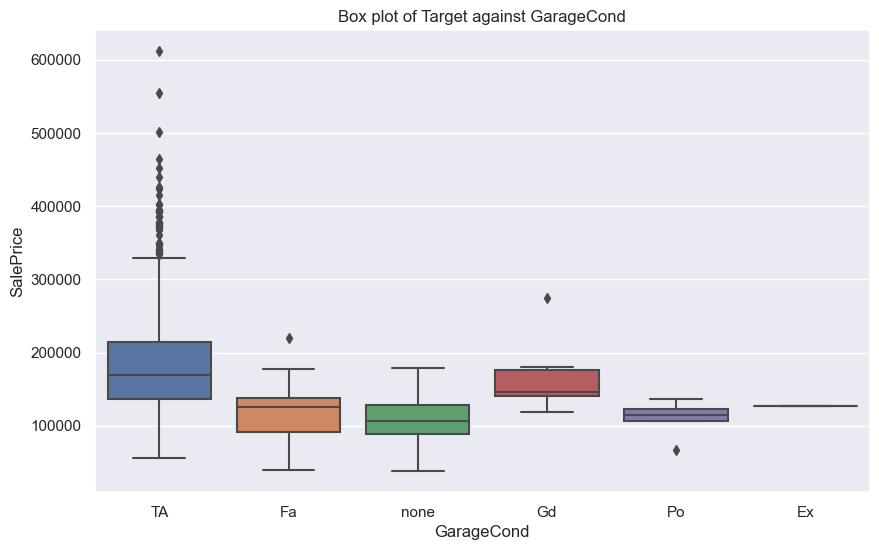

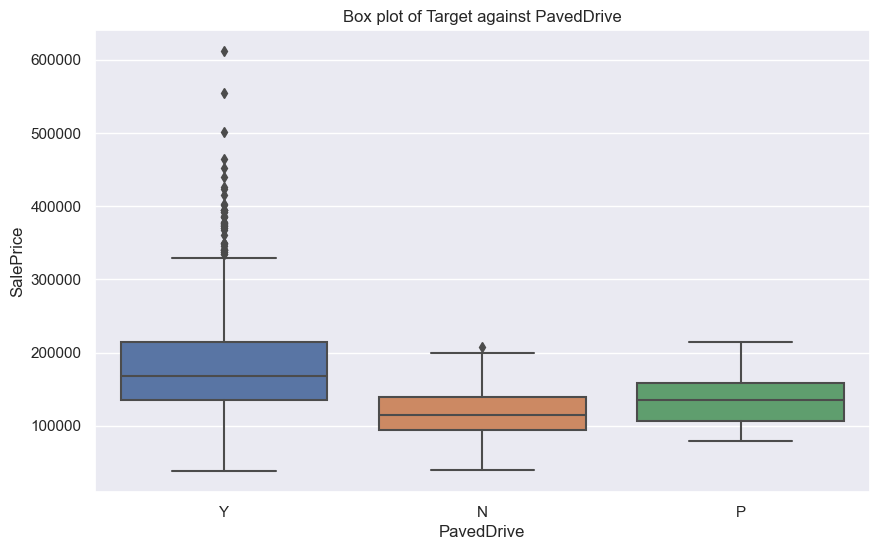

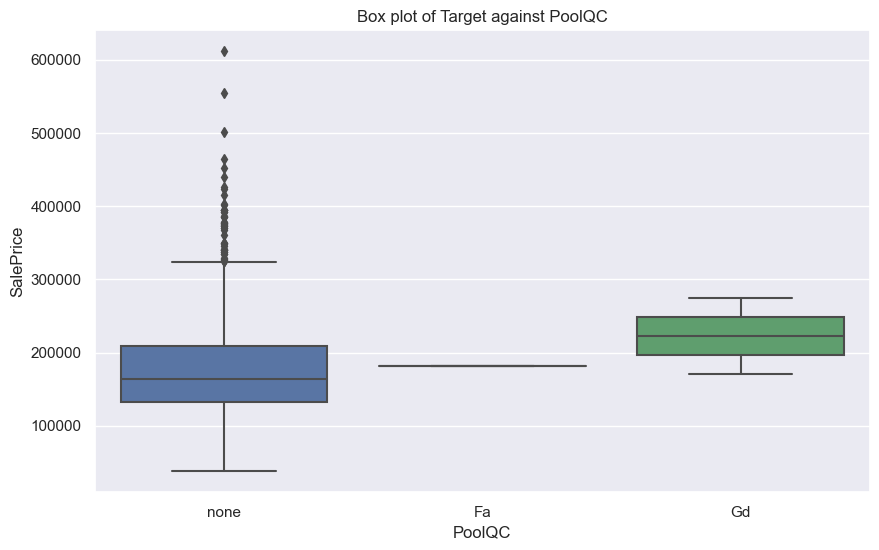

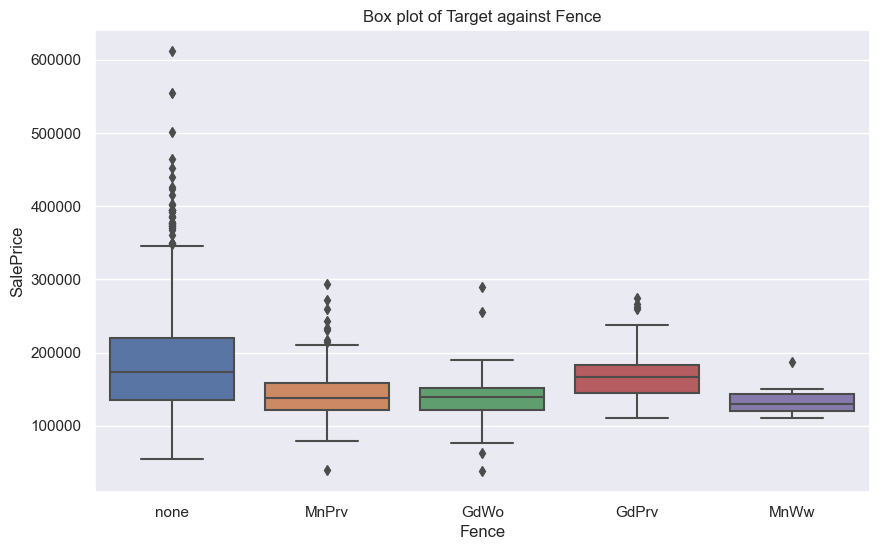

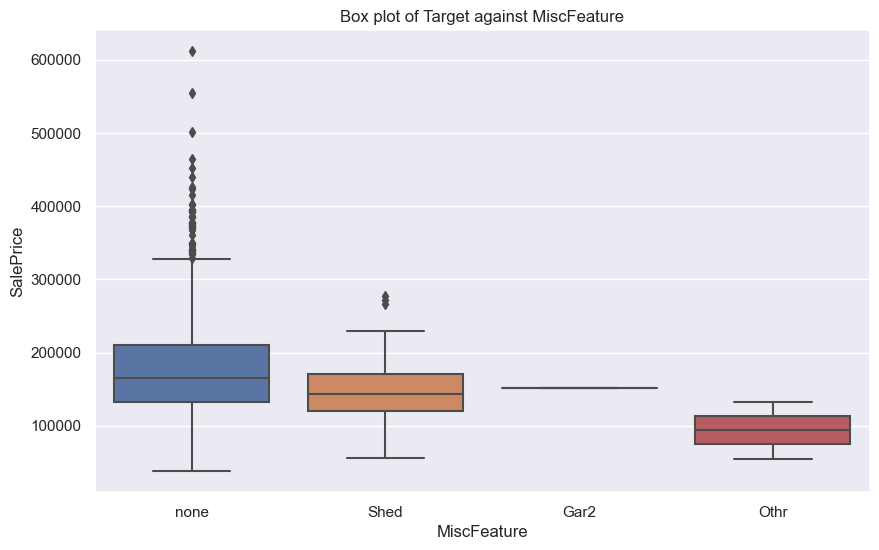

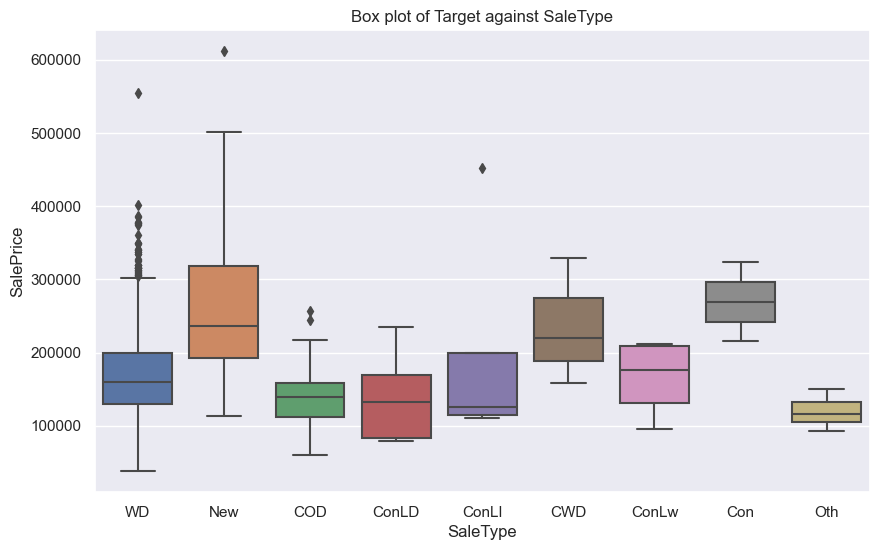

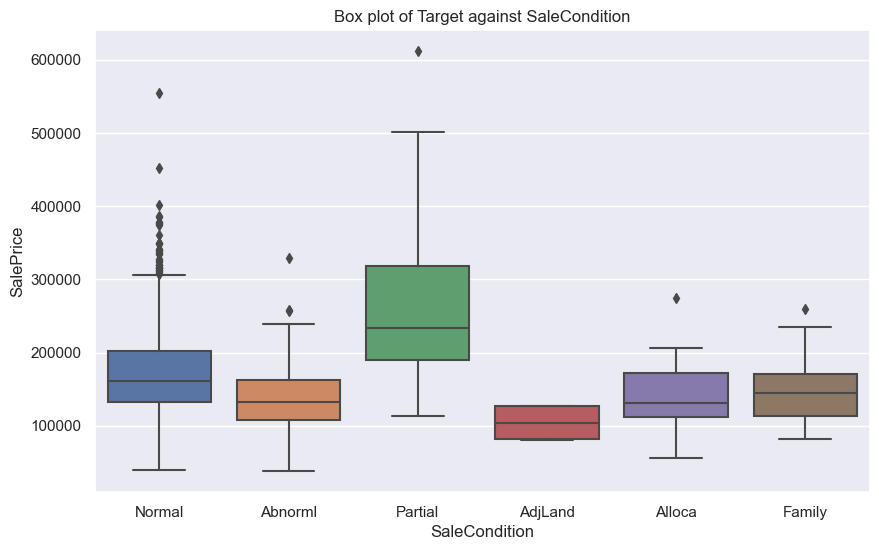

In [529]:
import matplotlib.pyplot as plt
# Loop and plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=housing_data_2)
    plt.title(f"Box plot of Target against {col}")
    plt.show()

In [530]:
housing_data_2 = pd.get_dummies(housing_data_2, drop_first=True )
housing_data_2.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...               0               0   
1          1976         0.0         978  ...               0               0   
2          2002       162.0         486  ...               0               0   
3          1970         0.0         216  ...               0               0   
4          2000       350.0         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 250 columns]

In [531]:
housing_data_2.shape

(1309, 250)

In [532]:
# Scaling the features

from sklearn.preprocessing import scale

cols = housing_data_2.columns
housing_data_2 = pd.DataFrame(scale(housing_data_2))
housing_data_2.columns = cols
housing_data_2.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [533]:
X = housing_data_2.drop(['SalePrice'], axis=1)

X.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.725554    0.085107    -0.234612 -0.200403     0.701969    -0.512178   
1 -1.723179   -0.857011     0.485284 -0.087273    -0.064401     2.277452   
2 -1.720805    0.085107    -0.090633  0.075044     0.701969    -0.512178   
3 -1.718431    0.320637    -0.474578 -0.092192     0.701969    -0.512178   
4 -1.716057    0.085107     0.677256  0.371150     1.468339    -0.512178   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.044551      0.886573    0.594300    0.628981  ...       -0.061922   
1   0.132195     -0.427779   -0.579929    1.259577  ...       -0.061922   
2   0.976969      0.837894    0.390607    0.118940  ...       -0.061922   
3  -1.929053     -0.719857   -0.579929   -0.507020  ...       -0.061922   
4   0.943178      0.740534    1.516908    0.510744  ...       -0.061922   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       -0.055364     -0.299875     -0.047928     0.391541   
1       -0.055364     -0.299875     -0.047928     0.391541   
2       -0.055364     -0.299875     -0.047928     0.391541   
3       -0.055364     -0.299875     -0.047928     0.391541   
4       -0.055364     -0.299875     -0.047928     0.391541   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.055364              -0.08774             -0.121362   
1              -0.055364              -0.08774             -0.121362   
2              -0.055364              -0.08774             -0.121362   
3              -0.055364              -0.08774             -0.121362   
4              -0.055364              -0.08774             -0.121362   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.461693              -0.302891  
1              0.461693              -0.302891  
2              0.461693              -0.302891  
3             -2.165942              -0.302891  
4              0.461693              -0.302891  

[5 rows x 249 columns]

In [534]:
# Putting response variable to y
y = housing_data_2['SalePrice']

y.head()

0    0.463032
1    0.061505
2    0.686102
3   -0.555657
4    1.080193
Name: SalePrice, dtype: float64

In [535]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size = 0.3, random_state=100)

In [536]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (916, 249)
y_train (916,)


In [537]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\alkar\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.389e+00, tolerance: 6.845e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\alkar\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e-01, tolerance: 7.250e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [538]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.187192      0.020620         0.008538        0.005053      0.0001   
1       0.086483      0.018500         0.008336        0.004460       0.001   
2       0.028061      0.003733         0.006975        0.002318        0.01   
3       0.020609      0.001936         0.008782        0.003545        0.05   
4       0.022202      0.007751         0.003130        0.006260         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.265723          -0.242718          -0.279197   
1   {'alpha': 0.001}          -0.245730          -0.228671          -0.264817   
2    {'alpha': 0.01}          -0.237012          -0.213327          -0.253859   
3    {'alpha': 0.05}          -0.282141          -0.240257          -0.299808   
4     {'alpha': 0.1}          -0.322627          -0.282355          -0.314586   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.237824  ...        -0.253262        0.016319                3   
1          -0.218082  ...        -0.238004        0.016066                2   
2          -0.204991  ...        -0.227011        0.017288                1   
3          -0.233516  ...        -0.265631        0.025148                4   
4          -0.252165  ...        -0.293226        0.025005                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.164321           -0.170301           -0.161072   
1           -0.166912           -0.172987           -0.164549   
2           -0.195061           -0.198940           -0.193743   
3           -0.254403           -0.263122           -0.249985   
4           -0.285838           -0.294290           -0.273203   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.166394           -0.169242         -0.166266         0.003344  
1           -0.171207           -0.172350         -0.169601         0.003297  
2           -0.198446           -0.197103         -0.196658         0.001983  
3           -0.261449           -0.254107         -0.256613         0.004916  
4           -0.290465           -0.279392         -0.284638         0.007574  

[5 rows x 21 columns]

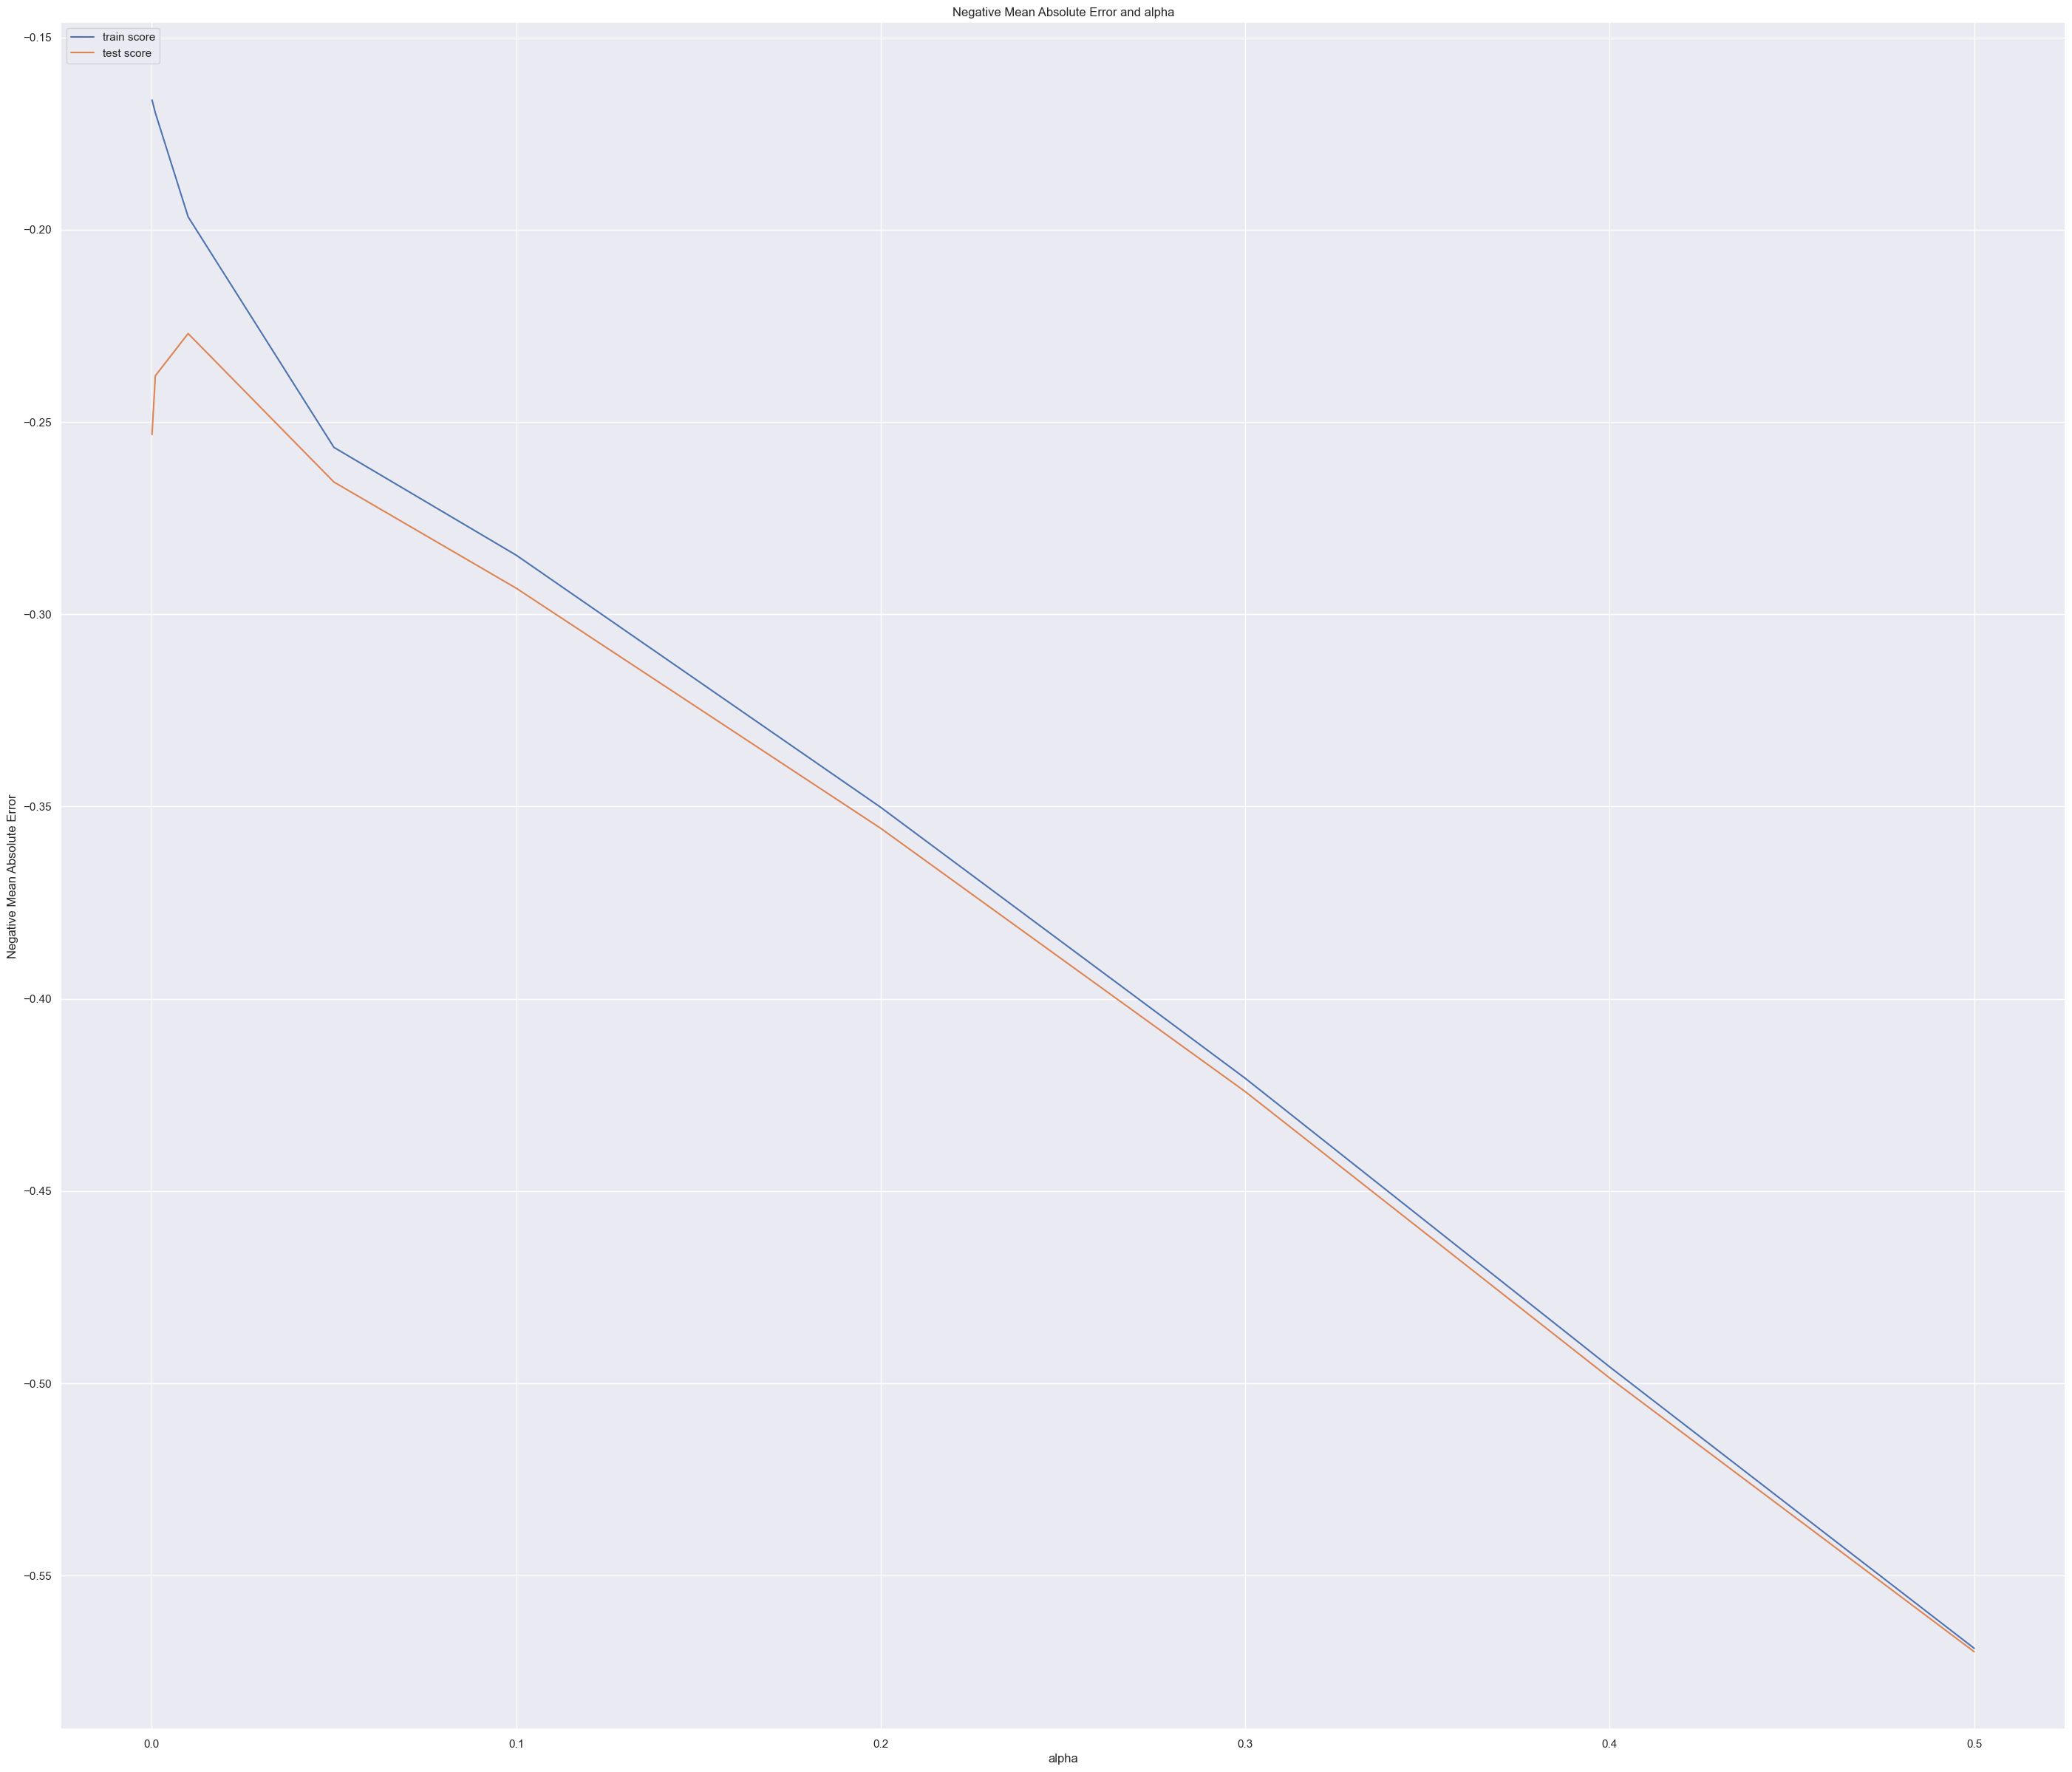

In [539]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [540]:
# At alpha = 0.02, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00, -5.73874763e-02,  2.98770434e-02,  4.71720114e-02,
        2.41903164e-01,  2.95469011e-02,  4.92582210e-02,  6.29320037e-02,
        1.04744580e-02,  1.19890712e-01,  0.00000000e+00, -0.00000000e+00,
        1.00681069e-01,  0.00000000e+00, -0.00000000e+00,  2.90373975e-01,
        9.87602754e-03, -0.00000000e+00,  1.76436802e-02, -2.49360601e-02,
       -5.01707515e-03,  1.79488637e-02,  8.24742023e-02,  8.80310046e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.40996847e-03,
        3.14371074e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.97178768e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.49127612e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -3.95594631e-04,
        0.00000000e+00,  

In [541]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.002),
 ('Id', -0.0),
 ('MSSubClass', -0.057),
 ('LotFrontage', 0.03),
 ('LotArea', 0.047),
 ('OverallQual', 0.242),
 ('OverallCond', 0.03),
 ('YearBuilt', 0.049),
 ('YearRemodAdd', 0.063),
 ('MasVnrArea', 0.01),
 ('BsmtFinSF1', 0.12),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.101),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.29),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', -0.0),
 ('HalfBath', 0.018),
 ('BedroomAbvGr', -0.025),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.018),
 ('GarageArea', 0.082),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.003),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.02),
 ('Street_Pave', 0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('Land

In [542]:
# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8964945120028462
0.8918894915144959


In [543]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.329623248721257


In [544]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [545]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [546]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable  Coeff
0     constant  0.002
1           Id -0.000
2   MSSubClass -0.057
3  LotFrontage  0.030
4      LotArea  0.047

In [547]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable  Coeff
16              GrLivArea  0.290
5             OverallQual  0.242
10             BsmtFinSF1  0.120
13            TotalBsmtSF  0.101
68   Neighborhood_NridgHt  0.091
..                    ...    ...
146          ExterQual_TA -0.022
20           BedroomAbvGr -0.025
157           BsmtQual_Gd -0.038
158           BsmtQual_TA -0.040
2              MSSubClass -0.057

[250 rows x 2 columns]

In [548]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred


Variable  Coeff
16              GrLivArea  0.290
5             OverallQual  0.242
10             BsmtFinSF1  0.120
13            TotalBsmtSF  0.101
68   Neighborhood_NridgHt  0.091
..                    ...    ...
146          ExterQual_TA -0.022
20           BedroomAbvGr -0.025
157           BsmtQual_Gd -0.038
158           BsmtQual_TA -0.040
2              MSSubClass -0.057

[67 rows x 2 columns]

In [549]:
# These 25 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(67, 2)

In [550]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'GarageArea', 'BsmtExposure_Gd', 'SaleType_New', 'YearRemodAdd', 'YearBuilt', 'LotArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'OverallCond', 'LotFrontage', 'Exterior2nd_CmentBd', 'BsmtFinType1_GLQ', 'MasVnrType_Stone', 'Foundation_PConc', 'Functional_Typ', 'Fireplaces', 'HalfBath', 'Condition1_Norm', 'Neighborhood_StoneBr', 'LotConfig_CulDSac', 'FireplaceQu_Gd', 'PoolQC_Gd', 'Neighborhood_Somerst', 'BsmtFullBath', 'MasVnrArea', 'WoodDeckSF', 'Neighborhood_Veenker', 'SaleType_CWD', 'ScreenPorch', 'GarageQual_Gd', 'PoolArea', 'Neighborhood_BrkSide', 'SaleCondition_Normal', 'constant', 'SaleType_Con', 'Exterior2nd_Plywood', 'Neighborhood_NAmes', 'Exterior1st_HdBoard', 'SaleCondition_Family', 'BsmtExposure_No', 'KitchenQual_TA', 'Condition1_RRAe', 'RoofStyle_Gable', 'KitchenAbvGr', 'Neighborhood_NWAmes', 'Neighborhood_Mitchel', 'Exterior2nd_Wd Shng', 'Foundation_Wood', 'Heati

## Ridge Regression

In [551]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [552]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013056      0.006985         0.008663        0.005417      0.0001   
1       0.014463      0.001994         0.003767        0.003574       0.001   
2       0.016854      0.007845         0.006535        0.008016        0.01   
3       0.014563      0.003178         0.008706        0.006345        0.05   
4       0.014563      0.002280         0.006261        0.007669         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.273172          -0.246977          -0.285703   
1   {'alpha': 0.001}          -0.273148          -0.246972          -0.285678   
2    {'alpha': 0.01}          -0.272917          -0.246917          -0.285450   
3    {'alpha': 0.05}          -0.272020          -0.246684          -0.284656   
4     {'alpha': 0.1}          -0.271197          -0.246418          -0.283976   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.242776  ...        -0.259270        0.017020               27   
1          -0.242765  ...        -0.259255        0.017013               26   
2          -0.242662  ...        -0.259109        0.016947               25   
3          -0.242222  ...        -0.258543        0.016738               24   
4          -0.241713  ...        -0.257984        0.016600               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.163410           -0.170112           -0.160781   
1           -0.163409           -0.170112           -0.160781   
2           -0.163400           -0.170117           -0.160783   
3           -0.163399           -0.170138           -0.160788   
4           -0.163466           -0.170159           -0.160795   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.165980           -0.169063         -0.165869         0.003468  
1           -0.165980           -0.169063         -0.165869         0.003469  
2           -0.165985           -0.169064         -0.165870         0.003471  
3           -0.166007           -0.169071         -0.165881         0.003476  
4           -0.166037           -0.169081         -0.165908         0.003472  

[5 rows x 21 columns]

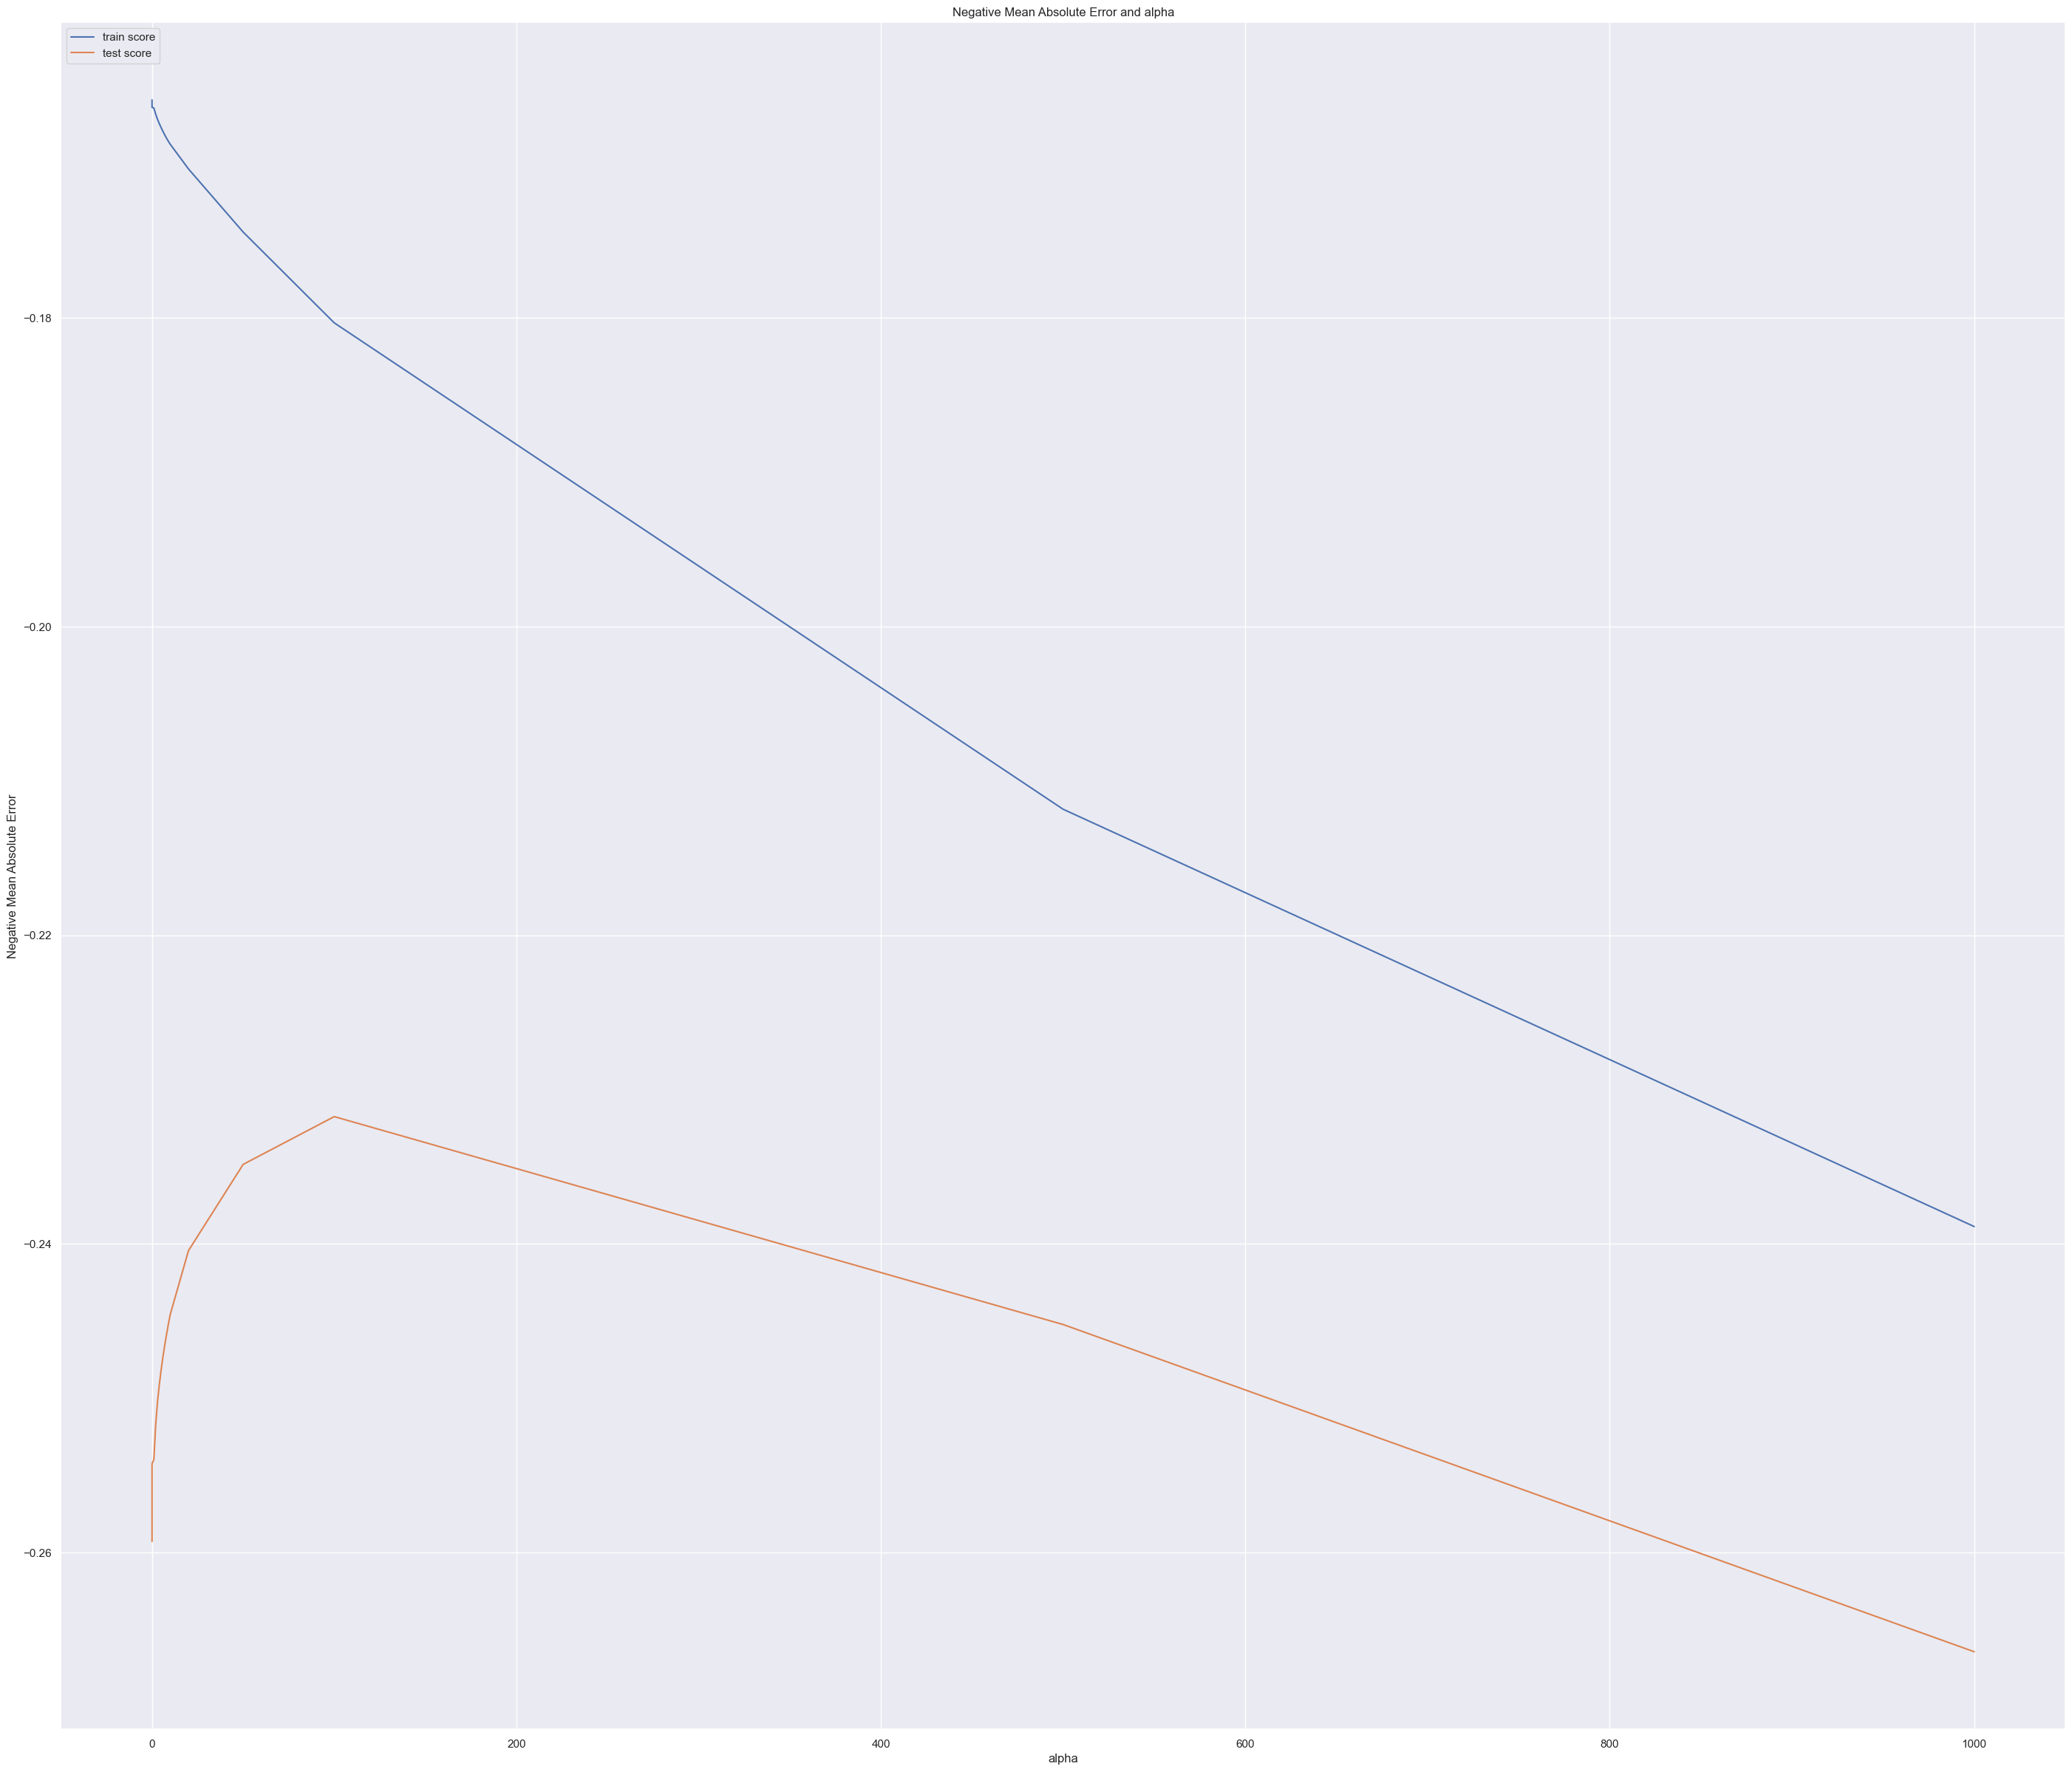

In [554]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [555]:
alpha = 80
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.32313845e-03, -4.57527834e-02,  4.13419654e-02,  8.73912598e-02,
        1.43084676e-01,  5.59853921e-02,  6.71214237e-02,  5.13171114e-02,
        3.11898550e-02,  1.13794864e-01,  2.29757955e-02, -1.86339188e-03,
        1.29811493e-01,  3.98246550e-02, -7.69986495e-03,  2.24790640e-01,
        8.89285652e-03, -1.47046872e-02,  3.15860275e-02, -1.86800942e-02,
       -1.60351019e-02,  4.03720429e-02,  7.96248575e-02,  2.38779162e-02,
        1.24435596e-02,  8.34496490e-03,  1.37787350e-02,  2.48412664e-02,
        1.78924629e-02,  3.30185214e-03, -1.61150675e-03,  2.15371541e-03,
        3.14855545e-02,  1.61088467e-02,  1.48690846e-02, -2.09202788e-02,
        3.96027133e-02,  2.34066308e-03, -2.62798385e-03,  6.38746140e-03,
        4.25984371e-03, -1.40933265e-03,  5.18717318e-03, -2.18068320e-02,
       -1.98163275e-03,  4.81395170e-34,  2.81440816e-02, -1.06718411e-02,
       -8.87553855e-03, -2.23004540e-03,  1.22329436e-02, -4.05175718e-02,
        0.00000000e+00,  

In [556]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.001),
 ('Id', -0.008),
 ('MSSubClass', -0.046),
 ('LotFrontage', 0.041),
 ('LotArea', 0.087),
 ('OverallQual', 0.143),
 ('OverallCond', 0.056),
 ('YearBuilt', 0.067),
 ('YearRemodAdd', 0.051),
 ('MasVnrArea', 0.031),
 ('BsmtFinSF1', 0.114),
 ('BsmtFinSF2', 0.023),
 ('BsmtUnfSF', -0.002),
 ('TotalBsmtSF', 0.13),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', -0.008),
 ('GrLivArea', 0.225),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', -0.015),
 ('HalfBath', 0.032),
 ('BedroomAbvGr', -0.019),
 ('KitchenAbvGr', -0.016),
 ('Fireplaces', 0.04),
 ('GarageArea', 0.08),
 ('WoodDeckSF', 0.024),
 ('OpenPorchSF', 0.012),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.014),
 ('ScreenPorch', 0.025),
 ('PoolArea', 0.018),
 ('MiscVal', 0.003),
 ('MoSold', -0.002),
 ('YrSold', 0.002),
 ('MSZoning_FV', 0.031),
 ('MSZoning_RH', 0.016),
 ('MSZoning_RL', 0.015),
 ('MSZoning_RM', -0.021),
 ('Street_Pave', 0.04),
 ('Alley_Pave', 0.002),
 ('Alley_none', -0.003),
 ('LotShape_IR2', 0.006),
 ('LotShape_IR3',

In [557]:
# ridge regression
lm = Ridge(alpha=80)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9289766530699018
0.9102518918382557


In [558]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.300328489449083


#### It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [559]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [563]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(200)

Variable  Coeff
16          GrLivArea  0.225
5         OverallQual  0.143
13        TotalBsmtSF  0.130
10         BsmtFinSF1  0.114
4             LotArea  0.087
..                ...    ...
199    Functional_Mod -0.011
181      Heating_Grav -0.011
176  BsmtFinType2_LwQ -0.011
182      Heating_OthW -0.011
192  Electrical_SBrkr -0.011

[200 rows x 2 columns]

In [561]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable  Coeff
16        GrLivArea  0.225
5       OverallQual  0.143
13      TotalBsmtSF  0.130
10       BsmtFinSF1  0.114
4           LotArea  0.087
..              ...    ...
195  KitchenQual_TA -0.065
194  KitchenQual_Gd -0.066
145    ExterQual_Gd -0.067
146    ExterQual_TA -0.071
157     BsmtQual_Gd -0.073

[250 rows x 2 columns]

In [562]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable  Coeff
16        GrLivArea  0.225
5       OverallQual  0.143
13      TotalBsmtSF  0.130
10       BsmtFinSF1  0.114
4           LotArea  0.087
..              ...    ...
195  KitchenQual_TA -0.065
194  KitchenQual_Gd -0.066
145    ExterQual_Gd -0.067
146    ExterQual_TA -0.071
157     BsmtQual_Gd -0.073

[238 rows x 2 columns]